#### Group Members:
From BM1 CS170
- Degrano, Kyle Matthew A.
- Gutierrez, Guillermo Miguel D.
- Subaan, Val Rindel S.

# Predicting the player efficiency of the New York Knick's best player: Julius Randle using Regression Analysis

## Background
Using the data science methodology and statistics, we are to attempt in predicting the regular season stats of the New York Knick's forward, Julius Randle. By implementing a regression model, we therefore predict a continuous positive outcome in Randle's basketball performance. Likewise, this model can be used to help predict a positive outcome on any NBA player's performance.

## Problem Statement
Use Julius Randle's data, statistics from his 1st season (2014-2015) up to the current season (2020-2021), and game highs data to predict whether how much he will improve the following seasons.

## Data Gathering Phase
### Using Beautiful Soup
The first step is to webscrape a website which displays every NBA player's career statistics. For this particular data science project, we take a look at Julius Randle's career statistics.

### Extracting from the Per Game Table
We extract the first table from the website by writing a function that loops over every table row.

In [1]:
# importing the needed libraries
from bs4 import BeautifulSoup as bs, Comment
from pip._vendor import requests as rq
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
# After prototyping what to extract from the website, we write a function
# that loops over and extracts the needed data
def extractPerGameTable():
    # Setting up variables = Nested Dictionaries
    perGameHashMap = {} # per game hashmap datastructure
    # Setting up Website Connection
    websiteURL = 'https://www.basketball-reference.com/players/r/randlju01.html' # Target Website
    pageInstance = rq.get(websiteURL)
    
    soup = bs(pageInstance.content, 'html.parser')
    rawFindings = soup.find(id='div_per_game')
    
    # first row extraction 2014-15
    firstRow = rawFindings.find(id='per_game.2015') # find all per_game.2015
    perGameHashMap['season2014-15'] = {}
    concentrateFirstRow = firstRow.find_all('td') # find all table columns
    for firstRowData in concentrateFirstRow: # loop through all data columns
        getFirstRowAttribute = firstRowData.get('data-stat') # finds all 'data-stat' attribute and its value
        extractedData = firstRowData.get_text().strip() # extract all column data from first row
        perGameHashMap['season2014-15'][getFirstRowAttribute] = extractedData # input to nested Hashmap key: 'season 2014-15'

    #second row extraction 2015-16
    secondRow = rawFindings.find(id='per_game.2016')
    perGameHashMap['season2015-16'] = {}
    concentrateSecondRow = secondRow.find_all('td')
    for secondRowData in concentrateSecondRow:
        getSecondRowAttribute = secondRowData.get('data-stat') 
        extractedDataSecondRow = secondRowData.get_text().strip()
        perGameHashMap['season2015-16'][getSecondRowAttribute] = extractedDataSecondRow

    #third row extraction 2016-17
    thirdRow = rawFindings.find(id='per_game.2017')
    perGameHashMap['season2016-17'] = {}
    concentrateThirdRow = thirdRow.find_all('td')
    for thirdRowData in concentrateThirdRow:
        getThirdRowAttribute = thirdRowData.get('data-stat')
        extractedDataThirdRow = thirdRowData.get_text().strip()
        perGameHashMap['season2016-17'][getThirdRowAttribute] = extractedDataThirdRow

    # fourth row extraction 2017-18
    fourthRow = rawFindings.find(id='per_game.2018')
    perGameHashMap['season2017-18'] = {}
    concentrateFourthRow = fourthRow.find_all('td')
    for fourthRowData in concentrateFourthRow:
        getFourthRowAttribute = fourthRowData.get('data-stat')
        extractedDataFourthRow = fourthRowData.get_text().strip()
        perGameHashMap['season2017-18'][getFourthRowAttribute] = extractedDataFourthRow

    # fifth row extraction 2018-19
    fifthRow = rawFindings.find(id='per_game.2019')
    perGameHashMap['season2018-19'] = {}
    concentrateFifthRow = fifthRow.find_all('td')
    for fifthRowData in concentrateFifthRow:
        getFifthRowAttribute = fifthRowData.get('data-stat')
        extractedDataFifthRow = fifthRowData.get_text().strip()
        perGameHashMap['season2018-19'][getFifthRowAttribute] = extractedDataFifthRow

    # sixth row extraction 2019-20
    sixthRow = rawFindings.find(id='per_game.2020')
    perGameHashMap['season2019-20'] = {}
    concentrateSixthRow = sixthRow.find_all('td')
    for sixthRowData in concentrateSixthRow:
        getSixthRowAttribute = sixthRowData.get('data-stat')
        extractedDataSixthRow = sixthRowData.get_text().strip()
        perGameHashMap['season2019-20'][getSixthRowAttribute] = extractedDataSixthRow

    # seventh row extraction 2020-21
    seventhRow = rawFindings.find(id='per_game.2021')
    perGameHashMap['season2020-21'] = {}
    concentrateSeventhRow = seventhRow.find_all('td')
    for seventhRowData in concentrateSeventhRow:
        getSeventhRowAttribute = seventhRowData.get('data-stat')
        extractedDataSeventhRow = seventhRowData.get_text().strip()
        perGameHashMap['season2020-21'][getSeventhRowAttribute] = extractedDataSeventhRow
    
    # Extract Footer Section
    findFooter = rawFindings.find('tfoot') # extract footer section
    findRowsFooter = findFooter.find_all('tr')

    perGameHashMap['career'] = {}
    perGameHashMap['4season'] = {}
    perGameHashMap['2season'] = {}
    perGameHashMap['1season'] = {}
    i = 0 # initialize counter
    for countRowsFooter in findRowsFooter:
        if i == 0: # career row
            concentrateCareerRow = countRowsFooter.find_all('td')
            for careerData in concentrateCareerRow:
                getCareerAttribute = careerData.get('data-stat')
                extractCareerData = careerData.get_text().strip()
                perGameHashMap['career'][getCareerAttribute] = extractCareerData
        elif i == 2: # 4 seasons row
            concentrate4SeasonsRow = countRowsFooter.find_all('td')
            for fourSeasonsData in concentrate4SeasonsRow:
                get4SeasonsAttribute = fourSeasonsData.get('data-stat')
                extract4SeasonData = fourSeasonsData.get_text().strip()
                perGameHashMap['4season'][get4SeasonsAttribute] = extract4SeasonData
        elif i == 3: # 2 seasons row
            concentrate2SeasonsRow = countRowsFooter.find_all('td')
            for twoSeasonsData in concentrate2SeasonsRow:
                get2SeasonsAttribute = twoSeasonsData.get('data-stat')
                extract2SeasonData = twoSeasonsData.get_text().strip()
                perGameHashMap['2season'][get2SeasonsAttribute] = extract2SeasonData
        elif i == 4: # 1 seasons row
            concentrate1SeasonsRow = countRowsFooter.find_all('td')
            for oneSeasonsData in concentrate1SeasonsRow:
                get1SeasonsAttribute = oneSeasonsData.get('data-stat')
                extract1SeasonData = oneSeasonsData.get_text().strip()
                perGameHashMap['1season'][get1SeasonsAttribute] = extract1SeasonData
        i += 1
        
    df = pd.DataFrame(perGameHashMap)
    # transpose
    df_t = df.T
    df_t.to_csv('perGameTable.csv')

#### The Totals Table
After the first table, we extract the data from the second table. After prototyping the codes using the command prompt, we write a function that loops over the **Totals** table.

In [3]:
def extractTotalGameTable():
    # establishing connection
    url = 'https://www.basketball-reference.com/players/r/randlju01.html'
    pageInstance = rq.get(url)
    
    soup = bs(pageInstance.content, 'html.parser')
    
    # after evaluating the webpage, we check the data we need
    # using beautiful soup, find all divs with an id of 'all_totals'
    div_allTotals = soup.findAll("div", {"id":"all_totals"})
    # after prototyping, we store the first index to a variable
    # notice that the exact data we need is embedded in an HTML comment
    dataset = div_allTotals[0]
    # after prototyping 'print(dataset)' we see that the data we need cannot be extracted
    # due to it being an HTML comment tag
    # hence, we use an external sevice such as HTML formatter and Line Break Removal Tool
    # then, we copy the raw HTML comment and store it in a variable
    raw_dataset = "<div class=\"table_wrapper setup_commented commented\" id=\"all_totals\"> <div class=\"section_heading\" id=\"totals_sh\"> <span class=\"section_anchor\" data-label=\"Totals\" id=\"totals_link\"></span><h2>Totals</h2> <div class=\"section_heading_text\"> <ul> </ul> </div> </div><div class=\"placeholder\"></div> <!-- <div class=\"table_container\" id=\"div_totals\"> <table class=\"row_summable sortable stats_table\" id=\"totals\" data-cols-to-freeze=\"1,3\"> <caption>Totals Table</caption> <colgroup><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col></colgroup> <thead> <tr> <th aria-label=\"If listed as single number, the year the season ended.&#x2605; - Indicates All-Star for league.Only on regular season tables.\" data-stat=\"season\" scope=\"col\" class=\" poptip sort_default_asc center\" data-tip=\"If listed as single number, the year the season ended.<br>&#x2605; - Indicates All-Star for league.<br>Only on regular season tables.\" >Season</th> <th aria-label=\"Player's age on February 1 of the season\" data-stat=\"age\" scope=\"col\" class=\" poptip sort_default_asc center\" data-tip=\"Player's age on February 1 of the season\" >Age</th> <th aria-label=\"Team\" data-stat=\"team_id\" scope=\"col\" class=\" poptip sort_default_asc center\" data-tip=\"Team\" >Tm</th> <th aria-label=\"League\" data-stat=\"lg_id\" scope=\"col\" class=\" poptip sort_default_asc center\" data-tip=\"League\" >Lg</th> <th aria-label=\"Position\" data-stat=\"pos\" scope=\"col\" class=\" poptip sort_default_asc center\" data-tip=\"Position\" >Pos</th> <th aria-label=\"Games\" data-stat=\"g\" scope=\"col\" class=\" poptip center\" data-tip=\"Games\" >G</th> <th aria-label=\"Games Started\" data-stat=\"gs\" scope=\"col\" class=\" poptip center\" data-tip=\"Games Started\" >GS</th> <th aria-label=\"Minutes Played\" data-stat=\"mp\" scope=\"col\" class=\" poptip center\" data-tip=\"Minutes Played\" >MP</th> <th aria-label=\"Field Goals\" data-stat=\"fg\" scope=\"col\" class=\" poptip center\" data-tip=\"Field Goals\" >FG</th> <th aria-label=\"Field Goal Attempts\" data-stat=\"fga\" scope=\"col\" class=\" poptip center\" data-tip=\"Field Goal Attempts\" >FGA</th> <th aria-label=\"Field Goal Percentage\" data-stat=\"fg_pct\" scope=\"col\" class=\" poptip center\" data-tip=\"Field Goal Percentage\" >FG%</th> <th aria-label=\"3-Point Field Goals\" data-stat=\"fg3\" scope=\"col\" class=\" poptip center\" data-tip=\"3-Point Field Goals\" >3P</th> <th aria-label=\"3-Point Field Goal Attempts\" data-stat=\"fg3a\" scope=\"col\" class=\" poptip center\" data-tip=\"3-Point Field Goal Attempts\" >3PA</th> <th aria-label=\"3-Point Field Goal Percentage\" data-stat=\"fg3_pct\" scope=\"col\" class=\" poptip center\" data-tip=\"3-Point Field Goal Percentage\" >3P%</th> <th aria-label=\"2-Point Field Goals\" data-stat=\"fg2\" scope=\"col\" class=\" poptip center\" data-tip=\"2-Point Field Goals\" >2P</th> <th aria-label=\"2-point Field Goal Attempts\" data-stat=\"fg2a\" scope=\"col\" class=\" poptip center\" data-tip=\"2-point Field Goal Attempts\" >2PA</th> <th aria-label=\"2-Point Field Goal Percentage\" data-stat=\"fg2_pct\" scope=\"col\" class=\" poptip center\" data-tip=\"2-Point Field Goal Percentage\" >2P%</th> <th aria-label=\"Effective Field Goal Percentage\" data-stat=\"efg_pct\" scope=\"col\" class=\" poptip center\" data-tip=\"<strong>Effective Field Goal Percentage</strong><br>This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.\" >eFG%</th> <th aria-label=\"Free Throws\" data-stat=\"ft\" scope=\"col\" class=\" poptip center\" data-tip=\"Free Throws\" >FT</th> <th aria-label=\"Free Throw Attempts\" data-stat=\"fta\" scope=\"col\" class=\" poptip center\" data-tip=\"Free Throw Attempts\" >FTA</th> <th aria-label=\"Free Throw Percentage\" data-stat=\"ft_pct\" scope=\"col\" class=\" poptip center\" data-tip=\"Free Throw Percentage\" >FT%</th> <th aria-label=\"Offensive Rebounds\" data-stat=\"orb\" scope=\"col\" class=\" poptip center\" data-tip=\"Offensive Rebounds\" >ORB</th> <th aria-label=\"Defensive Rebounds\" data-stat=\"drb\" scope=\"col\" class=\" poptip center\" data-tip=\"Defensive Rebounds\" >DRB</th> <th aria-label=\"Total Rebounds\" data-stat=\"trb\" scope=\"col\" class=\" poptip center\" data-tip=\"Total Rebounds\" >TRB</th> <th aria-label=\"Assists\" data-stat=\"ast\" scope=\"col\" class=\" poptip center\" data-tip=\"Assists\" >AST</th> <th aria-label=\"Steals\" data-stat=\"stl\" scope=\"col\" class=\" poptip center\" data-tip=\"Steals\" >STL</th> <th aria-label=\"Blocks\" data-stat=\"blk\" scope=\"col\" class=\" poptip center\" data-tip=\"Blocks\" >BLK</th> <th aria-label=\"Turnovers\" data-stat=\"tov\" scope=\"col\" class=\" poptip center\" data-tip=\"Turnovers\" >TOV</th> <th aria-label=\"Personal Fouls\" data-stat=\"pf\" scope=\"col\" class=\" poptip center\" data-tip=\"Personal Fouls\" >PF</th> <th aria-label=\"Points\" data-stat=\"pts\" scope=\"col\" class=\" poptip center\" data-tip=\"Points\" >PTS</th> <th aria-label=\"&nbsp;\" data-stat=\"DUMMY\" scope=\"col\" class=\" poptip center\" >&nbsp;</th> <th aria-label=\"Triple-Doubles\" data-stat=\"trp_dbl\" scope=\"col\" class=\" poptip center\" data-tip=\"<strong>Triple Doubles</strong> The NBA did not track Triple-Doubles until 1979-80 when Magic Johnson popularized the feat. Nonetheless, we can present Triple-Doubles since 1950-51 when rebounds became an official statistic. A small number may yet be unaccounted for but we're confident in the completeness of the list. \" >Trp Dbl</th> </tr> </thead> <tbody><tr id=\"totals.2015\" class=\"full_table\" ><th scope=\"row\" class=\"left \" data-stat=\"season\" ><a href=\"/players/r/randlju01/gamelog/2015/\">2014-15</a></th><td class=\"center \" data-stat=\"age\" >20</td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/LAL/2015.html\">LAL</a></td><td class=\"left \" data-stat=\"lg_id\" ><a href=\"/leagues/NBA_2015.html\">NBA</a></td><td class=\"center \" data-stat=\"pos\" >PF</td><td class=\"right \" data-stat=\"g\" >1</td><td class=\"right iz\" data-stat=\"gs\" >0</td><td class=\"right \" data-stat=\"mp\" >14</td><td class=\"right \" data-stat=\"fg\" >1</td><td class=\"right \" data-stat=\"fga\" >3</td><td class=\"right \" data-stat=\"fg_pct\" >.333</td><td class=\"right iz\" data-stat=\"fg3\" >0</td><td class=\"right iz\" data-stat=\"fg3a\" >0</td><td class=\"right iz\" data-stat=\"fg3_pct\" ></td><td class=\"right \" data-stat=\"fg2\" >1</td><td class=\"right \" data-stat=\"fg2a\" >3</td><td class=\"right \" data-stat=\"fg2_pct\" >.333</td><td class=\"right \" data-stat=\"efg_pct\" >.333</td><td class=\"right iz\" data-stat=\"ft\" >0</td><td class=\"right \" data-stat=\"fta\" >2</td><td class=\"right iz\" data-stat=\"ft_pct\" >.000</td><td class=\"right iz\" data-stat=\"orb\" >0</td><td class=\"right iz\" data-stat=\"drb\" >0</td><td class=\"right iz\" data-stat=\"trb\" >0</td><td class=\"right iz\" data-stat=\"ast\" >0</td><td class=\"right iz\" data-stat=\"stl\" >0</td><td class=\"right iz\" data-stat=\"blk\" >0</td><td class=\"right \" data-stat=\"tov\" >1</td><td class=\"right \" data-stat=\"pf\" >1</td><td class=\"right \" data-stat=\"pts\" >2</td><td class=\"right iz\" data-stat=\"DUMMY\" ></td><td class=\"center iz\" data-stat=\"trp_dbl\" >0</td></tr> <tr id=\"totals.2016\" class=\"full_table\" ><th scope=\"row\" class=\"left \" data-stat=\"season\" ><a href=\"/players/r/randlju01/gamelog/2016/\">2015-16</a></th><td class=\"center \" data-stat=\"age\" >21</td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/LAL/2016.html\">LAL</a></td><td class=\"left \" data-stat=\"lg_id\" ><a href=\"/leagues/NBA_2016.html\">NBA</a></td><td class=\"center \" data-stat=\"pos\" >PF</td><td class=\"right \" data-stat=\"g\" >81</td><td class=\"right \" data-stat=\"gs\" >60</td><td class=\"right \" data-stat=\"mp\" >2286</td><td class=\"right \" data-stat=\"fg\" >358</td><td class=\"right \" data-stat=\"fga\" >835</td><td class=\"right \" data-stat=\"fg_pct\" >.429</td><td class=\"right \" data-stat=\"fg3\" >10</td><td class=\"right \" data-stat=\"fg3a\" >36</td><td class=\"right \" data-stat=\"fg3_pct\" >.278</td><td class=\"right \" data-stat=\"fg2\" >348</td><td class=\"right \" data-stat=\"fg2a\" >799</td><td class=\"right \" data-stat=\"fg2_pct\" >.436</td><td class=\"right \" data-stat=\"efg_pct\" >.435</td><td class=\"right \" data-stat=\"ft\" >193</td><td class=\"right \" data-stat=\"fta\" >270</td><td class=\"right \" data-stat=\"ft_pct\" >.715</td><td class=\"right \" data-stat=\"orb\" >172</td><td class=\"right \" data-stat=\"drb\" >657</td><td class=\"right \" data-stat=\"trb\" >829</td><td class=\"right \" data-stat=\"ast\" >144</td><td class=\"right \" data-stat=\"stl\" >53</td><td class=\"right \" data-stat=\"blk\" >29</td><td class=\"right \" data-stat=\"tov\" >149</td><td class=\"right \" data-stat=\"pf\" >242</td><td class=\"right \" data-stat=\"pts\" >919</td><td class=\"right iz\" data-stat=\"DUMMY\" ></td><td class=\"center \" data-stat=\"trp_dbl\" >1</td></tr> <tr id=\"totals.2017\" class=\"full_table\" ><th scope=\"row\" class=\"left \" data-stat=\"season\" ><a href=\"/players/r/randlju01/gamelog/2017/\">2016-17</a></th><td class=\"center \" data-stat=\"age\" >22</td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/LAL/2017.html\">LAL</a></td><td class=\"left \" data-stat=\"lg_id\" ><a href=\"/leagues/NBA_2017.html\">NBA</a></td><td class=\"center \" data-stat=\"pos\" >PF</td><td class=\"right \" data-stat=\"g\" >74</td><td class=\"right \" data-stat=\"gs\" >73</td><td class=\"right \" data-stat=\"mp\" >2132</td><td class=\"right \" data-stat=\"fg\" >377</td><td class=\"right \" data-stat=\"fga\" >773</td><td class=\"right \" data-stat=\"fg_pct\" >.488</td><td class=\"right \" data-stat=\"fg3\" >17</td><td class=\"right \" data-stat=\"fg3a\" >63</td><td class=\"right \" data-stat=\"fg3_pct\" >.270</td><td class=\"right \" data-stat=\"fg2\" >360</td><td class=\"right \" data-stat=\"fg2a\" >710</td><td class=\"right \" data-stat=\"fg2_pct\" >.507</td><td class=\"right \" data-stat=\"efg_pct\" >.499</td><td class=\"right \" data-stat=\"ft\" >204</td><td class=\"right \" data-stat=\"fta\" >282</td><td class=\"right \" data-stat=\"ft_pct\" >.723</td><td class=\"right \" data-stat=\"orb\" >150</td><td class=\"right \" data-stat=\"drb\" >486</td><td class=\"right \" data-stat=\"trb\" >636</td><td class=\"right \" data-stat=\"ast\" >264</td><td class=\"right \" data-stat=\"stl\" >49</td><td class=\"right \" data-stat=\"blk\" >37</td><td class=\"right \" data-stat=\"tov\" >173</td><td class=\"right \" data-stat=\"pf\" >248</td><td class=\"right \" data-stat=\"pts\" >975</td><td class=\"right iz\" data-stat=\"DUMMY\" ></td><td class=\"center \" data-stat=\"trp_dbl\" >3</td></tr> <tr id=\"totals.2018\" class=\"full_table\" ><th scope=\"row\" class=\"left \" data-stat=\"season\" ><a href=\"/players/r/randlju01/gamelog/2018/\">2017-18</a></th><td class=\"center \" data-stat=\"age\" >23</td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/LAL/2018.html\">LAL</a></td><td class=\"left \" data-stat=\"lg_id\" ><a href=\"/leagues/NBA_2018.html\">NBA</a></td><td class=\"center \" data-stat=\"pos\" >C</td><td class=\"right \" data-stat=\"g\" ><strong>82</strong></td><td class=\"right \" data-stat=\"gs\" >49</td><td class=\"right \" data-stat=\"mp\" >2190</td><td class=\"right \" data-stat=\"fg\" >504</td><td class=\"right \" data-stat=\"fga\" >904</td><td class=\"right \" data-stat=\"fg_pct\" >.558</td><td class=\"right \" data-stat=\"fg3\" >10</td><td class=\"right \" data-stat=\"fg3a\" >45</td><td class=\"right \" data-stat=\"fg3_pct\" >.222</td><td class=\"right \" data-stat=\"fg2\" >494</td><td class=\"right \" data-stat=\"fg2a\" >859</td><td class=\"right \" data-stat=\"fg2_pct\" >.575</td><td class=\"right \" data-stat=\"efg_pct\" >.563</td><td class=\"right \" data-stat=\"ft\" >305</td><td class=\"right \" data-stat=\"fta\" >425</td><td class=\"right \" data-stat=\"ft_pct\" >.718</td><td class=\"right \" data-stat=\"orb\" >181</td><td class=\"right \" data-stat=\"drb\" >473</td><td class=\"right \" data-stat=\"trb\" >654</td><td class=\"right \" data-stat=\"ast\" >210</td><td class=\"right \" data-stat=\"stl\" >43</td><td class=\"right \" data-stat=\"blk\" >45</td><td class=\"right \" data-stat=\"tov\" >213</td><td class=\"right \" data-stat=\"pf\" >274</td><td class=\"right \" data-stat=\"pts\" >1323</td><td class=\"right iz\" data-stat=\"DUMMY\" ></td><td class=\"center \" data-stat=\"trp_dbl\" >1</td></tr> <tr id=\"totals.2019\" class=\"full_table\" ><th scope=\"row\" class=\"left \" data-stat=\"season\" ><a href=\"/players/r/randlju01/gamelog/2019/\">2018-19</a></th><td class=\"center \" data-stat=\"age\" >24</td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/NOP/2019.html\">NOP</a></td><td class=\"left \" data-stat=\"lg_id\" ><a href=\"/leagues/NBA_2019.html\">NBA</a></td><td class=\"center \" data-stat=\"pos\" >PF</td><td class=\"right \" data-stat=\"g\" >73</td><td class=\"right \" data-stat=\"gs\" >49</td><td class=\"right \" data-stat=\"mp\" >2232</td><td class=\"right \" data-stat=\"fg\" >571</td><td class=\"right \" data-stat=\"fga\" >1089</td><td class=\"right \" data-stat=\"fg_pct\" >.524</td><td class=\"right \" data-stat=\"fg3\" >67</td><td class=\"right \" data-stat=\"fg3a\" >195</td><td class=\"right \" data-stat=\"fg3_pct\" >.344</td><td class=\"right \" data-stat=\"fg2\" >504</td><td class=\"right \" data-stat=\"fg2a\" >894</td><td class=\"right \" data-stat=\"fg2_pct\" >.564</td><td class=\"right \" data-stat=\"efg_pct\" >.555</td><td class=\"right \" data-stat=\"ft\" >356</td><td class=\"right \" data-stat=\"fta\" >487</td><td class=\"right \" data-stat=\"ft_pct\" >.731</td><td class=\"right \" data-stat=\"orb\" >162</td><td class=\"right \" data-stat=\"drb\" >472</td><td class=\"right \" data-stat=\"trb\" >634</td><td class=\"right \" data-stat=\"ast\" >229</td><td class=\"right \" data-stat=\"stl\" >52</td><td class=\"right \" data-stat=\"blk\" >45</td><td class=\"right \" data-stat=\"tov\" >208</td><td class=\"right \" data-stat=\"pf\" >246</td><td class=\"right \" data-stat=\"pts\" >1565</td><td class=\"right iz\" data-stat=\"DUMMY\" ></td><td class=\"center \" data-stat=\"trp_dbl\" >1</td></tr> <tr id=\"totals.2020\" class=\"full_table\" ><th scope=\"row\" class=\"left \" data-stat=\"season\" ><a href=\"/players/r/randlju01/gamelog/2020/\">2019-20</a></th><td class=\"center \" data-stat=\"age\" >25</td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/NYK/2020.html\">NYK</a></td><td class=\"left \" data-stat=\"lg_id\" ><a href=\"/leagues/NBA_2020.html\">NBA</a></td><td class=\"center \" data-stat=\"pos\" >PF</td><td class=\"right \" data-stat=\"g\" >64</td><td class=\"right \" data-stat=\"gs\" >64</td><td class=\"right \" data-stat=\"mp\" >2080</td><td class=\"right \" data-stat=\"fg\" >463</td><td class=\"right \" data-stat=\"fga\" >1006</td><td class=\"right \" data-stat=\"fg_pct\" >.460</td><td class=\"right \" data-stat=\"fg3\" >64</td><td class=\"right \" data-stat=\"fg3a\" >231</td><td class=\"right \" data-stat=\"fg3_pct\" >.277</td><td class=\"right \" data-stat=\"fg2\" >399</td><td class=\"right \" data-stat=\"fg2a\" >775</td><td class=\"right \" data-stat=\"fg2_pct\" >.515</td><td class=\"right \" data-stat=\"efg_pct\" >.492</td><td class=\"right \" data-stat=\"ft\" >258</td><td class=\"right \" data-stat=\"fta\" >352</td><td class=\"right \" data-stat=\"ft_pct\" >.733</td><td class=\"right \" data-stat=\"orb\" >151</td><td class=\"right \" data-stat=\"drb\" >471</td><td class=\"right \" data-stat=\"trb\" >622</td><td class=\"right \" data-stat=\"ast\" >198</td><td class=\"right \" data-stat=\"stl\" >51</td><td class=\"right \" data-stat=\"blk\" >22</td><td class=\"right \" data-stat=\"tov\" >193</td><td class=\"right \" data-stat=\"pf\" >178</td><td class=\"right \" data-stat=\"pts\" >1248</td><td class=\"right iz\" data-stat=\"DUMMY\" ></td><td class=\"center iz\" data-stat=\"trp_dbl\" >0</td></tr> <tr id=\"totals.2021\" class=\"full_table\" ><th scope=\"row\" class=\"left \" data-stat=\"season\" ><a href=\"/players/r/randlju01/gamelog/2021/\">2020-21</a></th><td class=\"center \" data-stat=\"age\" >26</td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/NYK/2021.html\">NYK</a></td><td class=\"left \" data-stat=\"lg_id\" ><a href=\"/leagues/NBA_2021.html\">NBA</a></td><td class=\"center \" data-stat=\"pos\" >PF</td><td class=\"right \" data-stat=\"g\" >23</td><td class=\"right \" data-stat=\"gs\" >23</td><td class=\"right \" data-stat=\"mp\" ><strong>845</strong></td><td class=\"right \" data-stat=\"fg\" >182</td><td class=\"right \" data-stat=\"fga\" >383</td><td class=\"right \" data-stat=\"fg_pct\" >.475</td><td class=\"right \" data-stat=\"fg3\" >36</td><td class=\"right \" data-stat=\"fg3a\" >91</td><td class=\"right \" data-stat=\"fg3_pct\" >.396</td><td class=\"right \" data-stat=\"fg2\" >146</td><td class=\"right \" data-stat=\"fg2a\" >292</td><td class=\"right \" data-stat=\"fg2_pct\" >.500</td><td class=\"right \" data-stat=\"efg_pct\" >.522</td><td class=\"right \" data-stat=\"ft\" >120</td><td class=\"right \" data-stat=\"fta\" >149</td><td class=\"right \" data-stat=\"ft_pct\" >.805</td><td class=\"right \" data-stat=\"orb\" >33</td><td class=\"right \" data-stat=\"drb\" >218</td><td class=\"right \" data-stat=\"trb\" >251</td><td class=\"right \" data-stat=\"ast\" >138</td><td class=\"right \" data-stat=\"stl\" >19</td><td class=\"right \" data-stat=\"blk\" >4</td><td class=\"right \" data-stat=\"tov\" >78</td><td class=\"right \" data-stat=\"pf\" >77</td><td class=\"right \" data-stat=\"pts\" >520</td><td class=\"right iz\" data-stat=\"DUMMY\" ></td><td class=\"center \" data-stat=\"trp_dbl\" >1</td></tr> </tbody><tfoot><tr ><th scope=\"row\" class=\"left \" data-stat=\"season\" >Career</th><td class=\"center iz\" data-stat=\"age\" ></td><td class=\"left iz\" data-stat=\"team_id\" ></td><td class=\"left \" data-stat=\"lg_id\" >NBA</td><td class=\"center iz\" data-stat=\"pos\" ></td><td class=\"right \" data-stat=\"g\" >398</td><td class=\"right \" data-stat=\"gs\" >318</td><td class=\"right \" data-stat=\"mp\" >11779</td><td class=\"right \" data-stat=\"fg\" >2456</td><td class=\"right \" data-stat=\"fga\" >4993</td><td class=\"right \" data-stat=\"fg_pct\" >.492</td><td class=\"right \" data-stat=\"fg3\" >204</td><td class=\"right \" data-stat=\"fg3a\" >661</td><td class=\"right \" data-stat=\"fg3_pct\" >.309</td><td class=\"right \" data-stat=\"fg2\" >2252</td><td class=\"right \" data-stat=\"fg2a\" >4332</td><td class=\"right \" data-stat=\"fg2_pct\" >.520</td><td class=\"right \" data-stat=\"efg_pct\" >.512</td><td class=\"right \" data-stat=\"ft\" >1436</td><td class=\"right \" data-stat=\"fta\" >1967</td><td class=\"right \" data-stat=\"ft_pct\" >.730</td><td class=\"right \" data-stat=\"orb\" >849</td><td class=\"right \" data-stat=\"drb\" >2777</td><td class=\"right \" data-stat=\"trb\" >3626</td><td class=\"right \" data-stat=\"ast\" >1183</td><td class=\"right \" data-stat=\"stl\" >267</td><td class=\"right \" data-stat=\"blk\" >182</td><td class=\"right \" data-stat=\"tov\" >1015</td><td class=\"right \" data-stat=\"pf\" >1266</td><td class=\"right \" data-stat=\"pts\" >6552</td><td class=\"right iz\" data-stat=\"DUMMY\" ></td><td class=\"center \" data-stat=\"trp_dbl\" >7</td></tr> <tr class=\"blank_table partial_table\" ><th scope=\"row\" class=\"left iz\" data-stat=\"season\" ></th><td class=\"center iz\" data-stat=\"age\" ></td><td class=\"left iz\" data-stat=\"team_id\" ></td><td class=\"left iz\" data-stat=\"lg_id\" ></td><td class=\"center iz\" data-stat=\"pos\" ></td><td class=\"right iz\" data-stat=\"g\" ></td><td class=\"right iz\" data-stat=\"gs\" ></td><td class=\"right iz\" data-stat=\"mp\" ></td><td class=\"right iz\" data-stat=\"fg\" ></td><td class=\"right iz\" data-stat=\"fga\" ></td><td class=\"right iz\" data-stat=\"fg_pct\" ></td><td class=\"right iz\" data-stat=\"fg3\" ></td><td class=\"right iz\" data-stat=\"fg3a\" ></td><td class=\"right iz\" data-stat=\"fg3_pct\" ></td><td class=\"right iz\" data-stat=\"fg2\" ></td><td class=\"right iz\" data-stat=\"fg2a\" ></td><td class=\"right iz\" data-stat=\"fg2_pct\" ></td><td class=\"right iz\" data-stat=\"efg_pct\" ></td><td class=\"right iz\" data-stat=\"ft\" ></td><td class=\"right iz\" data-stat=\"fta\" ></td><td class=\"right iz\" data-stat=\"ft_pct\" ></td><td class=\"right iz\" data-stat=\"orb\" ></td><td class=\"right iz\" data-stat=\"drb\" ></td><td class=\"right iz\" data-stat=\"trb\" ></td><td class=\"right iz\" data-stat=\"ast\" ></td><td class=\"right iz\" data-stat=\"stl\" ></td><td class=\"right iz\" data-stat=\"blk\" ></td><td class=\"right iz\" data-stat=\"tov\" ></td><td class=\"right iz\" data-stat=\"pf\" ></td><td class=\"right iz\" data-stat=\"pts\" ></td><td class=\"right iz\" data-stat=\"DUMMY\" ></td><td class=\"center iz\" data-stat=\"trp_dbl\" ></td></tr> <tr ><th scope=\"row\" class=\"left \" data-stat=\"season\" >4 seasons</th><td class=\"center iz\" data-stat=\"age\" ></td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/LAL/\">LAL</a></td><td class=\"left \" data-stat=\"lg_id\" >NBA</td><td class=\"center iz\" data-stat=\"pos\" ></td><td class=\"right \" data-stat=\"g\" >238</td><td class=\"right \" data-stat=\"gs\" >182</td><td class=\"right \" data-stat=\"mp\" >6622</td><td class=\"right \" data-stat=\"fg\" >1240</td><td class=\"right \" data-stat=\"fga\" >2515</td><td class=\"right \" data-stat=\"fg_pct\" >.493</td><td class=\"right \" data-stat=\"fg3\" >37</td><td class=\"right \" data-stat=\"fg3a\" >144</td><td class=\"right \" data-stat=\"fg3_pct\" >.257</td><td class=\"right \" data-stat=\"fg2\" >1203</td><td class=\"right \" data-stat=\"fg2a\" >2371</td><td class=\"right \" data-stat=\"fg2_pct\" >.507</td><td class=\"right \" data-stat=\"efg_pct\" >.500</td><td class=\"right \" data-stat=\"ft\" >702</td><td class=\"right \" data-stat=\"fta\" >979</td><td class=\"right \" data-stat=\"ft_pct\" >.717</td><td class=\"right \" data-stat=\"orb\" >503</td><td class=\"right \" data-stat=\"drb\" >1616</td><td class=\"right \" data-stat=\"trb\" >2119</td><td class=\"right \" data-stat=\"ast\" >618</td><td class=\"right \" data-stat=\"stl\" >145</td><td class=\"right \" data-stat=\"blk\" >111</td><td class=\"right \" data-stat=\"tov\" >536</td><td class=\"right \" data-stat=\"pf\" >765</td><td class=\"right \" data-stat=\"pts\" >3219</td><td class=\"right iz\" data-stat=\"DUMMY\" ></td><td class=\"center \" data-stat=\"trp_dbl\" >5</td></tr> <tr ><th scope=\"row\" class=\"left \" data-stat=\"season\" >2 seasons</th><td class=\"center iz\" data-stat=\"age\" ></td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/NYK/\">NYK</a></td><td class=\"left \" data-stat=\"lg_id\" >NBA</td><td class=\"center iz\" data-stat=\"pos\" ></td><td class=\"right \" data-stat=\"g\" >87</td><td class=\"right \" data-stat=\"gs\" >87</td><td class=\"right \" data-stat=\"mp\" >2925</td><td class=\"right \" data-stat=\"fg\" >645</td><td class=\"right \" data-stat=\"fga\" >1389</td><td class=\"right \" data-stat=\"fg_pct\" >.464</td><td class=\"right \" data-stat=\"fg3\" >100</td><td class=\"right \" data-stat=\"fg3a\" >322</td><td class=\"right \" data-stat=\"fg3_pct\" >.311</td><td class=\"right \" data-stat=\"fg2\" >545</td><td class=\"right \" data-stat=\"fg2a\" >1067</td><td class=\"right \" data-stat=\"fg2_pct\" >.511</td><td class=\"right \" data-stat=\"efg_pct\" >.500</td><td class=\"right \" data-stat=\"ft\" >378</td><td class=\"right \" data-stat=\"fta\" >501</td><td class=\"right \" data-stat=\"ft_pct\" >.754</td><td class=\"right \" data-stat=\"orb\" >184</td><td class=\"right \" data-stat=\"drb\" >689</td><td class=\"right \" data-stat=\"trb\" >873</td><td class=\"right \" data-stat=\"ast\" >336</td><td class=\"right \" data-stat=\"stl\" >70</td><td class=\"right \" data-stat=\"blk\" >26</td><td class=\"right \" data-stat=\"tov\" >271</td><td class=\"right \" data-stat=\"pf\" >255</td><td class=\"right \" data-stat=\"pts\" >1768</td><td class=\"right iz\" data-stat=\"DUMMY\" ></td><td class=\"center \" data-stat=\"trp_dbl\" >1</td></tr> <tr ><th scope=\"row\" class=\"left \" data-stat=\"season\" >1 season</th><td class=\"center iz\" data-stat=\"age\" ></td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/NOH/\">NOP</a></td><td class=\"left \" data-stat=\"lg_id\" >NBA</td><td class=\"center iz\" data-stat=\"pos\" ></td><td class=\"right \" data-stat=\"g\" >73</td><td class=\"right \" data-stat=\"gs\" >49</td><td class=\"right \" data-stat=\"mp\" >2232</td><td class=\"right \" data-stat=\"fg\" >571</td><td class=\"right \" data-stat=\"fga\" >1089</td><td class=\"right \" data-stat=\"fg_pct\" >.524</td><td class=\"right \" data-stat=\"fg3\" >67</td><td class=\"right \" data-stat=\"fg3a\" >195</td><td class=\"right \" data-stat=\"fg3_pct\" >.344</td><td class=\"right \" data-stat=\"fg2\" >504</td><td class=\"right \" data-stat=\"fg2a\" >894</td><td class=\"right \" data-stat=\"fg2_pct\" >.564</td><td class=\"right \" data-stat=\"efg_pct\" >.555</td><td class=\"right \" data-stat=\"ft\" >356</td><td class=\"right \" data-stat=\"fta\" >487</td><td class=\"right \" data-stat=\"ft_pct\" >.731</td><td class=\"right \" data-stat=\"orb\" >162</td><td class=\"right \" data-stat=\"drb\" >472</td><td class=\"right \" data-stat=\"trb\" >634</td><td class=\"right \" data-stat=\"ast\" >229</td><td class=\"right \" data-stat=\"stl\" >52</td><td class=\"right \" data-stat=\"blk\" >45</td><td class=\"right \" data-stat=\"tov\" >208</td><td class=\"right \" data-stat=\"pf\" >246</td><td class=\"right \" data-stat=\"pts\" >1565</td><td class=\"right iz\" data-stat=\"DUMMY\" ></td><td class=\"center \" data-stat=\"trp_dbl\" >1</td></tr> </tfoot> </table> </div> --> </div>\n"
    
    # then, we parse the comment
    soup = bs(raw_dataset, 'lxml')
    
    # extracting the HTML tags embedded from the HTML comments
    for comment in soup.findAll(text=lambda text:isinstance(text, Comment)):
        html_comment = comment
        
    commentSoup = bs(html_comment, 'lxml')
    table_totals = commentSoup.findAll('table', {'id':'totals'})
    
    # after parsing the comment tags, we extract the needed data
    for t in table_totals:
        # defining the hashmap structure
        totalGameHashMap = {}
        
        #first row extraction season 2014-15
        firstRow = t.find(id='totals.2015')
        totalGameHashMap['season2014-15'] = {}
        concentrateFirstRow = firstRow.findAll('td')
        #loop through all the columns on the first row
        for firstRowData in concentrateFirstRow:
            getFirstRowAttribute = firstRowData.get('data-stat')
            extractedData = firstRowData.get_text().strip()
            totalGameHashMap['season2014-15'][getFirstRowAttribute] = extractedData

        #second row extraction season 2015-16
        secondRow = t.find(id='totals.2016')
        totalGameHashMap['season2015-16'] = {}
        concentrateSecondRow = secondRow.find_all('td')
        #extract
        for secondRowData in concentrateSecondRow:
            getSecondRowAttribute = secondRowData.get('data-stat')
            extractedDataSecondRow = secondRowData.get_text().strip()
            totalGameHashMap['season2015-16'][getSecondRowAttribute] = extractedDataSecondRow

        #third row extraction season 2016-17
        thirdRow = t.find(id='totals.2017')
        totalGameHashMap['season2016-17'] = {}
        concentrateThirdRow = thirdRow.find_all('td')
        for thirdRowData in concentrateThirdRow:
            getThirdRowAttribute = thirdRowData.get('data-stat')
            extractedDataThirdRow = thirdRowData.get_text().strip()
            totalGameHashMap['season2016-17'][getThirdRowAttribute] = extractedDataThirdRow

        #fourth row extraction season 2017-18
        fourthRow = t.find(id='totals.2018')
        totalGameHashMap['season2017-18'] = {}
        concentrateFourthRow = fourthRow.find_all('td')
        for fourthRowData in concentrateFourthRow:
            getFourthRowAttribute = fourthRowData.get('data-stat')
            extractedDataFourthRow = fourthRowData.get_text().strip()
            totalGameHashMap['season2017-18'][getFourthRowAttribute] = extractedDataFourthRow

        #fifth row extraction season 2018-19
        fifthRow = t.find(id='totals.2019')
        totalGameHashMap['season2018-19'] = {}
        concentrateFifthRow = fifthRow.find_all('td')
        for fifthRowData in concentrateFifthRow:
            getFifthRowAttribute = fifthRowData.get('data-stat')
            extractedDataFifthRow = fifthRowData.get_text().strip()
            totalGameHashMap['season2018-19'][getFifthRowAttribute] = extractedDataFifthRow

        #sixth row extraction season 2019-20
        sixthRow = t.find(id='totals.2020')
        totalGameHashMap['season2019-20'] = {}
        concentrateSixthRow = sixthRow.find_all('td')
        for sixthRowData in concentrateSixthRow:
            getSixthRowAttribute = sixthRowData.get('data-stat')
            extractedDataSixthRow = sixthRowData.get_text().strip()
            totalGameHashMap['season2019-20'][getSixthRowAttribute] = extractedDataSixthRow

        #seventh row extraction season 2020-21 (current season)
        seventhRow = t.find(id='totals.2021')
        totalGameHashMap['season2020-21'] = {}
        concentrateSeventhRow = seventhRow.find_all('td')
        for seventhRowData in concentrateSeventhRow:
            getSeventhRowAttribute = seventhRowData.get('data-stat')
            extractedDataSeventhRow = seventhRowData.get_text().strip()
            totalGameHashMap['season2020-21'][getSeventhRowAttribute] = extractedDataSeventhRow

        #Extract Footer Section
        getFooter = t.find('tfoot')
        getRowFooter = t.find_all('tr')

        totalGameHashMap['career'] = {}
        totalGameHashMap['4season'] = {}
        totalGameHashMap['2season'] = {}
        totalGameHashMap['1season'] = {}
        #initialize the counter
        i = 0
        for countRowFooter in getRowFooter:
            if i == 1:
                concentrateCareerRow = countRowFooter.find_all('td')
                for careerData in concentrateCareerRow:
                    getCareerAttribute = careerData.get('data-stat')
                    extractCareerData = careerData.get_text().strip()
                    totalGameHashMap['career'][getCareerAttribute] = extractCareerData
            elif i == 2:
                concentrate4SeasonsRow = countRowFooter.find_all('td')
                for fourSeasonsData in concentrate4SeasonsRow:
                    get4SeasonsAttribute = fourSeasonsData.get('data-stat')
                    extract4SeasonData = fourSeasonsData.get_text().strip()
                    totalGameHashMap['4season'][get4SeasonsAttribute] = extract4SeasonData
            elif i == 3:
                concentrate2SeasonsRow = countRowFooter.find_all('td')
                for twoSeasonsData in concentrate2SeasonsRow:
                    get2SeasonsAttribute = twoSeasonsData.get('data-stat')
                    extract2SeasonData = twoSeasonsData.get_text().strip()
                    totalGameHashMap['2season'][get2SeasonsAttribute] = extract2SeasonData
            elif i == 4: # 1 seasons row
                concentrate1SeasonsRow = countRowFooter.find_all('td')
                for oneSeasonsData in concentrate1SeasonsRow:
                    get1SeasonsAttribute = oneSeasonsData.get('data-stat')
                    extract1SeasonData = oneSeasonsData.get_text().strip()
                    totalGameHashMap['1season'][get1SeasonsAttribute] = extract1SeasonData
            i += 1
            
        df = pd.DataFrame(totalGameHashMap)
        # transpose
        df_t = df.T
        df_t.to_csv('TotalGameTable.csv')

#### Julius Randle's Game Highs
In this portion, we created an **html** file in order to scrape Julius Randle's game highs easier. Just like the previous table above, we parse the HTML comments into actual HTML tags in order to grab our needed data.

In [4]:
def extractGameHigh():
    # from original url
    raw_dataset = "<div class=\"table_container\" id=\"div_game_highs\"> <table class=\"sortable stats_table\" id=\"game_highs\" data-cols-to-freeze=\"1,3\"> <caption> Game Highs Table</caption> <colgroup><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col></colgroup> <thead> <tr class=\"over_header\"> <th aria-label=\"\" data-stat=\"\" colspan=\"4\" class=\" over_header center\" ></th> <th aria-label=\"\" data-stat=\"highs\" colspan=\"19\" class=\" over_header center\" >Game Highs</th> </tr> <tr> <th aria-label=\"If listed as single number, the year the season ended.&#x2605; - Indicates All-Star for league.Only on regular season tables.\" data-stat=\"season\" scope=\"col\" class=\" poptip sort_default_asc center\" data-tip=\"If listed as single number, the year the season ended.<br>&#x2605; - Indicates All-Star for league.<br>Only on regular season tables.\" >Season</th> <th aria-label=\"Player's age on February 1 of the season\" data-stat=\"age\" scope=\"col\" class=\" poptip sort_default_asc center\" data-tip=\"Player's age on February 1 of the season\" >Age</th> <th aria-label=\"Team\" data-stat=\"team_id\" scope=\"col\" class=\" poptip sort_default_asc center\" data-tip=\"Team\" >Tm</th> <th aria-label=\"League\" data-stat=\"lg_id\" scope=\"col\" class=\" poptip sort_default_asc center\" data-tip=\"League\" >Lg</th> <th aria-label=\"Minutes Played\" data-stat=\"mp\" scope=\"col\" class=\" poptip center\" data-tip=\"Minutes Played\" data-over-header=\"Game Highs\" >MP</th> <th aria-label=\"Field Goals\" data-stat=\"fg\" scope=\"col\" class=\" poptip center\" data-tip=\"Field Goals\" data-over-header=\"Game Highs\" >FG</th> <th aria-label=\"Field Goal Attempts\" data-stat=\"fga\" scope=\"col\" class=\" poptip center\" data-tip=\"Field Goal Attempts\" data-over-header=\"Game Highs\" >FGA</th> <th aria-label=\"3-Point Field Goals\" data-stat=\"fg3\" scope=\"col\" class=\" poptip center\" data-tip=\"3-Point Field Goals\" data-over-header=\"Game Highs\" >3P</th> <th aria-label=\"3-Point Field Goal Attempts\" data-stat=\"fg3a\" scope=\"col\" class=\" poptip center\" data-tip=\"3-Point Field Goal Attempts\" data-over-header=\"Game Highs\" >3PA</th> <th aria-label=\"2-Point Field Goals\" data-stat=\"fg2\" scope=\"col\" class=\" poptip center\" data-tip=\"2-Point Field Goals\" data-over-header=\"Game Highs\" >2P</th> <th aria-label=\"2-point Field Goal Attempts\" data-stat=\"fg2a\" scope=\"col\" class=\" poptip center\" data-tip=\"2-point Field Goal Attempts\" data-over-header=\"Game Highs\" >2PA</th> <th aria-label=\"Free Throws\" data-stat=\"ft\" scope=\"col\" class=\" poptip center\" data-tip=\"Free Throws\" data-over-header=\"Game Highs\" >FT</th> <th aria-label=\"Free Throw Attempts\" data-stat=\"fta\" scope=\"col\" class=\" poptip center\" data-tip=\"Free Throw Attempts\" data-over-header=\"Game Highs\" >FTA</th> <th aria-label=\"Offensive Rebounds\" data-stat=\"orb\" scope=\"col\" class=\" poptip center\" data-tip=\"Offensive Rebounds\" data-over-header=\"Game Highs\" >ORB</th> <th aria-label=\"Defensive Rebounds\" data-stat=\"drb\" scope=\"col\" class=\" poptip center\" data-tip=\"Defensive Rebounds\" data-over-header=\"Game Highs\" >DRB</th> <th aria-label=\"Total Rebounds\" data-stat=\"trb\" scope=\"col\" class=\" poptip center\" data-tip=\"Total Rebounds\" data-over-header=\"Game Highs\" >TRB</th> <th aria-label=\"Assists\" data-stat=\"ast\" scope=\"col\" class=\" poptip center\" data-tip=\"Assists\" data-over-header=\"Game Highs\" >AST</th> <th aria-label=\"Steals\" data-stat=\"stl\" scope=\"col\" class=\" poptip center\" data-tip=\"Steals\" data-over-header=\"Game Highs\" >STL</th> <th aria-label=\"Blocks\" data-stat=\"blk\" scope=\"col\" class=\" poptip center\" data-tip=\"Blocks\" data-over-header=\"Game Highs\" >BLK</th> <th aria-label=\"Turnovers\" data-stat=\"tov\" scope=\"col\" class=\" poptip center\" data-tip=\"Turnovers\" data-over-header=\"Game Highs\" >TOV</th> <th aria-label=\"Personal Fouls\" data-stat=\"pf\" scope=\"col\" class=\" poptip center\" data-tip=\"Personal Fouls\" data-over-header=\"Game Highs\" >PF</th> <th aria-label=\"Points\" data-stat=\"pts\" scope=\"col\" class=\" poptip center\" data-tip=\"Points\" data-over-header=\"Game Highs\" >PTS</th> <th aria-label=\"Game Score\" data-stat=\"game_score\" scope=\"col\" class=\" poptip center\" data-tip=\"Game Score\" data-over-header=\"Game Highs\" >GmSc</th> </tr> </thead> <tbody><tr id=\"per_game.2015\" class=\"full_table\" ><th scope=\"row\" class=\"left \" data-stat=\"season\" ><a href=\"/players/r/randlju01/gamelog/2015/\">2014-15</a></th><td class=\"center \" data-stat=\"age\" >20</td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/LAL/2015.html\">LAL</a></td><td class=\"left \" data-stat=\"lg_id\" ><a href=\"/leagues/NBA_2015.html\">NBA</a></td><td class=\"right \" data-stat=\"mp\" ><a href=\"/boxscores/201410280LAL.html\">13:34</a></td><td class=\"right \" data-stat=\"fg\" ><a href=\"/boxscores/201410280LAL.html\">1</a></td><td class=\"right \" data-stat=\"fga\" ><a href=\"/boxscores/201410280LAL.html\">3</a></td><td class=\"right iz\" data-stat=\"fg3\" >0</td><td class=\"right iz\" data-stat=\"fg3a\" >0</td><td class=\"right \" data-stat=\"fg2\" ><a href=\"/boxscores/201410280LAL.html\">1</a></td><td class=\"right \" data-stat=\"fg2a\" ><a href=\"/boxscores/201410280LAL.html\">3</a></td><td class=\"right iz\" data-stat=\"ft\" >0</td><td class=\"right \" data-stat=\"fta\" ><a href=\"/boxscores/201410280LAL.html\">2</a></td><td class=\"right iz\" data-stat=\"orb\" >0</td><td class=\"right iz\" data-stat=\"drb\" >0</td><td class=\"right iz\" data-stat=\"trb\" >0</td><td class=\"right iz\" data-stat=\"ast\" >0</td><td class=\"right iz\" data-stat=\"stl\" >0</td><td class=\"right iz\" data-stat=\"blk\" >0</td><td class=\"right \" data-stat=\"tov\" ><a href=\"/boxscores/201410280LAL.html\">1</a></td><td class=\"right \" data-stat=\"pf\" ><a href=\"/boxscores/201410280LAL.html\">1</a></td><td class=\"right \" data-stat=\"pts\" ><a href=\"/boxscores/201410280LAL.html\">2</a></td><td class=\"right \" data-stat=\"game_score\" ><a href=\"/boxscores/201410280LAL.html\">-1.9</a></td></tr> <tr id=\"per_game.2016\" class=\"full_table\" ><th scope=\"row\" class=\"left \" data-stat=\"season\" ><a href=\"/players/r/randlju01/gamelog/2016/\">2015-16</a></th><td class=\"center \" data-stat=\"age\" >21</td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/LAL/2016.html\">LAL</a></td><td class=\"left \" data-stat=\"lg_id\" ><a href=\"/leagues/NBA_2016.html\">NBA</a></td><td class=\"right \" data-stat=\"mp\" ><a href=\"/boxscores/201603300LAL.html\">38:56</a></td><td class=\"right \" data-stat=\"fg\" ><a href=\"/boxscores/201602210CHI.html\">10</a></td><td class=\"right \" data-stat=\"fga\" ><a href=\"/boxscores/201602210CHI.html\">19</a></td><td class=\"right \" data-stat=\"fg3\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2016&year_max=2016&is_playoffs=N&team_id=LAL&player_id=randlju01&c1stat=fg3&c1comp=eq&c1val=1&order_by=fg3'>1</a></td><td class=\"right \" data-stat=\"fg3a\" ><a href=\"/boxscores/201512250LAL.html\">3</a></td><td class=\"right \" data-stat=\"fg2\" ><a href=\"/boxscores/201602210CHI.html\">10</a></td><td class=\"right \" data-stat=\"fg2a\" ><a href=\"/boxscores/201602210CHI.html\">18</a></td><td class=\"right \" data-stat=\"ft\" ><a href=\"/boxscores/201603020DEN.html\">7</a></td><td class=\"right \" data-stat=\"fta\" ><a href=\"/boxscores/201512090MIN.html\">11</a></td><td class=\"right \" data-stat=\"orb\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2016&year_max=2016&is_playoffs=N&team_id=LAL&player_id=randlju01&c1stat=orb&c1comp=eq&c1val=7&order_by=orb'>7</a></td><td class=\"right \" data-stat=\"drb\" ><a href=\"/boxscores/201603250LAL.html\">18</a></td><td class=\"right \" data-stat=\"trb\" ><a href=\"/boxscores/201604060LAL.html\">20</a></td><td class=\"right \" data-stat=\"ast\" ><a href=\"/boxscores/201603250LAL.html\">10</a></td><td class=\"right \" data-stat=\"stl\" ><a href=\"/boxscores/201511010LAL.html\">4</a></td><td class=\"right \" data-stat=\"blk\" ><a href=\"/boxscores/201603220LAL.html\">3</a></td><td class=\"right \" data-stat=\"tov\" ><a href=\"/boxscores/201601290LAC.html\">6</a></td><td class=\"right \" data-stat=\"pf\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2016&year_max=2016&is_playoffs=N&team_id=LAL&player_id=randlju01&c1stat=pf&c1comp=eq&c1val=6&order_by=pf'>6</a></td><td class=\"right \" data-stat=\"pts\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2016&year_max=2016&is_playoffs=N&team_id=LAL&player_id=randlju01&c1stat=pts&c1comp=eq&c1val=23&order_by=pts'>23</a></td><td class=\"right \" data-stat=\"game_score\" ><a href=\"/boxscores/201511010LAL.html\">21.3</a></td></tr> <tr id=\"per_game.2017\" class=\"full_table\" ><th scope=\"row\" class=\"left \" data-stat=\"season\" ><a href=\"/players/r/randlju01/gamelog/2017/\">2016-17</a></th><td class=\"center \" data-stat=\"age\" >22</td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/LAL/2017.html\">LAL</a></td><td class=\"left \" data-stat=\"lg_id\" ><a href=\"/leagues/NBA_2017.html\">NBA</a></td><td class=\"right \" data-stat=\"mp\" ><a href=\"/boxscores/201703190LAL.html\">37:56</a></td><td class=\"right \" data-stat=\"fg\" ><a href=\"/boxscores/201703150HOU.html\">13</a></td><td class=\"right \" data-stat=\"fga\" ><a href=\"/boxscores/201612070HOU.html\">19</a></td><td class=\"right \" data-stat=\"fg3\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2017&year_max=2017&is_playoffs=N&team_id=LAL&player_id=randlju01&c1stat=fg3&c1comp=eq&c1val=2&order_by=fg3'>2</a></td><td class=\"right \" data-stat=\"fg3a\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2017&year_max=2017&is_playoffs=N&team_id=LAL&player_id=randlju01&c1stat=fg3a&c1comp=eq&c1val=4&order_by=fg3a'>4</a></td><td class=\"right \" data-stat=\"fg2\" ><a href=\"/boxscores/201703150HOU.html\">13</a></td><td class=\"right \" data-stat=\"fg2a\" ><a href=\"/boxscores/201612070HOU.html\">18</a></td><td class=\"right \" data-stat=\"ft\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2017&year_max=2017&is_playoffs=N&team_id=LAL&player_id=randlju01&c1stat=ft&c1comp=eq&c1val=9&order_by=ft'>9</a></td><td class=\"right \" data-stat=\"fta\" ><a href=\"/boxscores/201701050POR.html\">11</a></td><td class=\"right \" data-stat=\"orb\" ><a href=\"/boxscores/201611300CHI.html\">9</a></td><td class=\"right \" data-stat=\"drb\" ><a href=\"/boxscores/201702280LAL.html\">15</a></td><td class=\"right \" data-stat=\"trb\" ><a href=\"/boxscores/201611300CHI.html\">20</a></td><td class=\"right \" data-stat=\"ast\" ><a href=\"/boxscores/201701030LAL.html\">11</a></td><td class=\"right \" data-stat=\"stl\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2017&year_max=2017&is_playoffs=N&team_id=LAL&player_id=randlju01&c1stat=stl&c1comp=eq&c1val=3&order_by=stl'>3</a></td><td class=\"right \" data-stat=\"blk\" ><a href=\"/boxscores/201612200CHO.html\">5</a></td><td class=\"right \" data-stat=\"tov\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2017&year_max=2017&is_playoffs=N&team_id=LAL&player_id=randlju01&c1stat=tov&c1comp=eq&c1val=6&order_by=tov'>6</a></td><td class=\"right \" data-stat=\"pf\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2017&year_max=2017&is_playoffs=N&team_id=LAL&player_id=randlju01&c1stat=pf&c1comp=eq&c1val=6&order_by=pf'>6</a></td><td class=\"right \" data-stat=\"pts\" ><a href=\"/boxscores/201703150HOU.html\">32</a></td><td class=\"right \" data-stat=\"game_score\" ><a href=\"/boxscores/201702280LAL.html\">31.3</a></td></tr> <tr id=\"per_game.2018\" class=\"full_table\" ><th scope=\"row\" class=\"left \" data-stat=\"season\" ><a href=\"/players/r/randlju01/gamelog/2018/\">2017-18</a></th><td class=\"center \" data-stat=\"age\" >23</td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/LAL/2018.html\">LAL</a></td><td class=\"left \" data-stat=\"lg_id\" ><a href=\"/leagues/NBA_2018.html\">NBA</a></td><td class=\"right \" data-stat=\"mp\" ><a href=\"/boxscores/201803300LAL.html\">40:15</a></td><td class=\"right \" data-stat=\"fg\" ><a href=\"/boxscores/201803110LAL.html\">14</a></td><td class=\"right \" data-stat=\"fga\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2018&year_max=2018&is_playoffs=N&team_id=LAL&player_id=randlju01&c1stat=fga&c1comp=eq&c1val=19&order_by=fga'>19</a></td><td class=\"right \" data-stat=\"fg3\" ><a href=\"/boxscores/201712220GSW.html\">2</a></td><td class=\"right \" data-stat=\"fg3a\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2018&year_max=2018&is_playoffs=N&team_id=LAL&player_id=randlju01&c1stat=fg3a&c1comp=eq&c1val=3&order_by=fg3a'>3</a></td><td class=\"right \" data-stat=\"fg2\" ><a href=\"/boxscores/201803110LAL.html\">14</a></td><td class=\"right \" data-stat=\"fg2a\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2018&year_max=2018&is_playoffs=N&team_id=LAL&player_id=randlju01&c1stat=fg2a&c1comp=eq&c1val=19&order_by=fg2a'>19</a></td><td class=\"right \" data-stat=\"ft\" ><a href=\"/boxscores/201804060LAL.html\">10</a></td><td class=\"right \" data-stat=\"fta\" ><a href=\"/boxscores/201804010LAL.html\">14</a></td><td class=\"right \" data-stat=\"orb\" ><a href=\"/boxscores/201803130LAL.html\">7</a></td><td class=\"right \" data-stat=\"drb\" ><a href=\"/boxscores/201801130DAL.html\">12</a></td><td class=\"right \" data-stat=\"trb\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2018&year_max=2018&is_playoffs=N&team_id=LAL&player_id=randlju01&c1stat=trb&c1comp=eq&c1val=15&order_by=trb'>15</a></td><td class=\"right \" data-stat=\"ast\" ><a href=\"/boxscores/201802230LAL.html\">10</a></td><td class=\"right \" data-stat=\"stl\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2018&year_max=2018&is_playoffs=N&team_id=LAL&player_id=randlju01&c1stat=stl&c1comp=eq&c1val=2&order_by=stl'>2</a></td><td class=\"right \" data-stat=\"blk\" ><a href=\"/boxscores/201710250LAL.html\">3</a></td><td class=\"right \" data-stat=\"tov\" ><a href=\"/boxscores/201801130DAL.html\">7</a></td><td class=\"right \" data-stat=\"pf\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2018&year_max=2018&is_playoffs=N&team_id=LAL&player_id=randlju01&c1stat=pf&c1comp=eq&c1val=6&order_by=pf'>6</a></td><td class=\"right \" data-stat=\"pts\" ><a href=\"/boxscores/201803110LAL.html\">36</a></td><td class=\"right \" data-stat=\"game_score\" ><a href=\"/boxscores/201803110LAL.html\">36.9</a></td></tr> <tr id=\"per_game.2019\" class=\"full_table\" ><th scope=\"row\" class=\"left \" data-stat=\"season\" ><a href=\"/players/r/randlju01/gamelog/2019/\">2018-19</a></th><td class=\"center \" data-stat=\"age\" >24</td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/NOP/2019.html\">NOP</a></td><td class=\"left \" data-stat=\"lg_id\" ><a href=\"/leagues/NBA_2019.html\">NBA</a></td><td class=\"right \" data-stat=\"mp\" ><a href=\"/boxscores/201903150NOP.html\">42:06</a></td><td class=\"right \" data-stat=\"fg\" ><a href=\"/boxscores/201903150NOP.html\">20</a></td><td class=\"right \" data-stat=\"fga\" ><a href=\"/boxscores/201903150NOP.html\">34</a></td><td class=\"right \" data-stat=\"fg3\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2019&year_max=2019&is_playoffs=N&team_id=NOH&player_id=randlju01&c1stat=fg3&c1comp=eq&c1val=4&order_by=fg3'>4</a></td><td class=\"right \" data-stat=\"fg3a\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2019&year_max=2019&is_playoffs=N&team_id=NOH&player_id=randlju01&c1stat=fg3a&c1comp=eq&c1val=7&order_by=fg3a'>7</a></td><td class=\"right \" data-stat=\"fg2\" ><a href=\"/boxscores/201903150NOP.html\">18</a></td><td class=\"right \" data-stat=\"fg2a\" ><a href=\"/boxscores/201903150NOP.html\">27</a></td><td class=\"right \" data-stat=\"ft\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2019&year_max=2019&is_playoffs=N&team_id=NOH&player_id=randlju01&c1stat=ft&c1comp=eq&c1val=11&order_by=ft'>11</a></td><td class=\"right \" data-stat=\"fta\" ><a href=\"/boxscores/201812260DAL.html\">13</a></td><td class=\"right \" data-stat=\"orb\" ><a href=\"/boxscores/201811100NOP.html\">7</a></td><td class=\"right \" data-stat=\"drb\" ><a href=\"/boxscores/201812050NOP.html\">16</a></td><td class=\"right \" data-stat=\"trb\" ><a href=\"/boxscores/201812050NOP.html\">18</a></td><td class=\"right \" data-stat=\"ast\" ><a href=\"/boxscores/201811190NOP.html\">10</a></td><td class=\"right \" data-stat=\"stl\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2019&year_max=2019&is_playoffs=N&team_id=NOH&player_id=randlju01&c1stat=stl&c1comp=eq&c1val=3&order_by=stl'>3</a></td><td class=\"right \" data-stat=\"blk\" ><a href=\"/boxscores/201903150NOP.html\">3</a></td><td class=\"right \" data-stat=\"tov\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2019&year_max=2019&is_playoffs=N&team_id=NOH&player_id=randlju01&c1stat=tov&c1comp=eq&c1val=7&order_by=tov'>7</a></td><td class=\"right \" data-stat=\"pf\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2019&year_max=2019&is_playoffs=N&team_id=NOH&player_id=randlju01&c1stat=pf&c1comp=eq&c1val=6&order_by=pf'>6</a></td><td class=\"right \" data-stat=\"pts\" ><a href=\"/boxscores/201903150NOP.html\">45</a></td><td class=\"right \" data-stat=\"game_score\" ><a href=\"/boxscores/201903150NOP.html\">31.4</a></td></tr> <tr id=\"per_game.2020\" class=\"full_table\" ><th scope=\"row\" class=\"left \" data-stat=\"season\" ><a href=\"/players/r/randlju01/gamelog/2020/\">2019-20</a></th><td class=\"center \" data-stat=\"age\" >25</td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/NYK/2020.html\">NYK</a></td><td class=\"left \" data-stat=\"lg_id\" ><a href=\"/leagues/NBA_2020.html\">NBA</a></td><td class=\"right \" data-stat=\"mp\" ><a href=\"/boxscores/202002090ATL.html\">46:12</a></td><td class=\"right \" data-stat=\"fg\" ><a href=\"/boxscores/201912260BRK.html\">14</a></td><td class=\"right \" data-stat=\"fga\" ><a href=\"/boxscores/201912260BRK.html\">26</a></td><td class=\"right \" data-stat=\"fg3\" ><a href=\"/boxscores/201912260BRK.html\">5</a></td><td class=\"right \" data-stat=\"fg3a\" ><a href=\"/boxscores/201912260BRK.html\">9</a></td><td class=\"right \" data-stat=\"fg2\" ><a href=\"/boxscores/202002090ATL.html\">13</a></td><td class=\"right \" data-stat=\"fg2a\" ><a href=\"/boxscores/202002090ATL.html\">23</a></td><td class=\"right \" data-stat=\"ft\" ><a href=\"/boxscores/201912010NYK.html\">10</a></td><td class=\"right \" data-stat=\"fta\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2020&year_max=2020&is_playoffs=N&team_id=NYK&player_id=randlju01&c1stat=fta&c1comp=eq&c1val=13&order_by=fta'>13</a></td><td class=\"right \" data-stat=\"orb\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2020&year_max=2020&is_playoffs=N&team_id=NYK&player_id=randlju01&c1stat=orb&c1comp=eq&c1val=7&order_by=orb'>7</a></td><td class=\"right \" data-stat=\"drb\" ><a href=\"/boxscores/202002090ATL.html\">16</a></td><td class=\"right \" data-stat=\"trb\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2020&year_max=2020&is_playoffs=N&team_id=NYK&player_id=randlju01&c1stat=trb&c1comp=eq&c1val=18&order_by=trb'>18</a></td><td class=\"right \" data-stat=\"ast\" ><a href=\"/boxscores/201910300ORL.html\">7</a></td><td class=\"right \" data-stat=\"stl\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2020&year_max=2020&is_playoffs=N&team_id=NYK&player_id=randlju01&c1stat=stl&c1comp=eq&c1val=3&order_by=stl'>3</a></td><td class=\"right \" data-stat=\"blk\" ><a href=\"/boxscores/202001240NYK.html\">3</a></td><td class=\"right \" data-stat=\"tov\" ><a href=\"/boxscores/201910280NYK.html\">8</a></td><td class=\"right \" data-stat=\"pf\" ><a href=\"/boxscores/202003100WAS.html\">6</a></td><td class=\"right \" data-stat=\"pts\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2020&year_max=2020&is_playoffs=N&team_id=NYK&player_id=randlju01&c1stat=pts&c1comp=eq&c1val=35&order_by=pts'>35</a></td><td class=\"right \" data-stat=\"game_score\" ><a href=\"/boxscores/201911180NYK.html\">27.9</a></td></tr> <tr id=\"per_game.2021\" class=\"full_table\" ><th scope=\"row\" class=\"left \" data-stat=\"season\" ><a href=\"/players/r/randlju01/gamelog/2021/\">2020-21</a></th><td class=\"center \" data-stat=\"age\" >26</td><td class=\"left \" data-stat=\"team_id\" ><a href=\"/teams/NYK/2021.html\">NYK</a></td><td class=\"left \" data-stat=\"lg_id\" ><a href=\"/leagues/NBA_2021.html\">NBA</a></td><td class=\"right \" data-stat=\"mp\" ><a href=\"/boxscores/202012290CLE.html\">44:09</a></td><td class=\"right \" data-stat=\"fg\" ><a href=\"/boxscores/202101130NYK.html\">13</a></td><td class=\"right \" data-stat=\"fga\" ><a href=\"/boxscores/202101060NYK.html\">26</a></td><td class=\"right \" data-stat=\"fg3\" ><a href=\"/boxscores/202102030CHI.html\">5</a></td><td class=\"right \" data-stat=\"fg3a\" ><a href=\"/boxscores/202102070NYK.html\">8</a></td><td class=\"right \" data-stat=\"fg2\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2021&year_max=2021&is_playoffs=N&team_id=NYK&player_id=randlju01&c1stat=fg2&c1comp=eq&c1val=11&order_by=fg2'>11</a></td><td class=\"right \" data-stat=\"fg2a\" ><a href=\"/boxscores/202101060NYK.html\">21</a></td><td class=\"right \" data-stat=\"ft\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2021&year_max=2021&is_playoffs=N&team_id=NYK&player_id=randlju01&c1stat=ft&c1comp=eq&c1val=10&order_by=ft'>10</a></td><td class=\"right \" data-stat=\"fta\" ><a href=\"/boxscores/202101180NYK.html\">13</a></td><td class=\"right \" data-stat=\"orb\" ><a href=\"/boxscores/202101040ATL.html\">4</a></td><td class=\"right \" data-stat=\"drb\" ><a href=\"/boxscores/202101210GSW.html\">15</a></td><td class=\"right \" data-stat=\"trb\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2021&year_max=2021&is_playoffs=N&team_id=NYK&player_id=randlju01&c1stat=trb&c1comp=eq&c1val=17&order_by=trb'>17</a></td><td class=\"right \" data-stat=\"ast\" ><a href=\"/boxscores/202012290CLE.html\">11</a></td><td class=\"right \" data-stat=\"stl\" ><a href=\"/boxscores/202101170BOS.html\">3</a></td><td class=\"right \" data-stat=\"blk\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2021&year_max=2021&is_playoffs=N&team_id=NYK&player_id=randlju01&c1stat=blk&c1comp=eq&c1val=1&order_by=blk'>1</a></td><td class=\"right \" data-stat=\"tov\" ><a href=\"/boxscores/202012290CLE.html\">9</a></td><td class=\"right \" data-stat=\"pf\" ><a href=\"/boxscores/202101240POR.html\">6</a></td><td class=\"right \" data-stat=\"pts\" ><a target='_blank' rel='noopener' href='https://stathead.com/basketball/pgl_finder.cgi?request=1&match=game&year_min=2021&year_max=2021&is_playoffs=N&team_id=NYK&player_id=randlju01&c1stat=pts&c1comp=eq&c1val=30&order_by=pts'>30</a></td><td class=\"right \" data-stat=\"game_score\" ><a href=\"/boxscores/202012270NYK.html\">27.3</a></td></tr> </tbody><tfoot><tr ><th scope=\"row\" class=\"left \" data-stat=\"season\" >Career</th><td class=\"center iz\" data-stat=\"age\" ></td><td class=\"left iz\" data-stat=\"team_id\" ></td><td class=\"left iz\" data-stat=\"lg_id\" ></td><td class=\"right \" data-stat=\"mp\" >46:12</td><td class=\"right \" data-stat=\"fg\" >20</td><td class=\"right \" data-stat=\"fga\" >34</td><td class=\"right \" data-stat=\"fg3\" >5</td><td class=\"right \" data-stat=\"fg3a\" >9</td><td class=\"right \" data-stat=\"fg2\" >18</td><td class=\"right \" data-stat=\"fg2a\" >27</td><td class=\"right \" data-stat=\"ft\" >11</td><td class=\"right \" data-stat=\"fta\" >14</td><td class=\"right \" data-stat=\"orb\" >9</td><td class=\"right \" data-stat=\"drb\" >18</td><td class=\"right \" data-stat=\"trb\" >20</td><td class=\"right \" data-stat=\"ast\" >11</td><td class=\"right \" data-stat=\"stl\" >4</td><td class=\"right \" data-stat=\"blk\" >5</td><td class=\"right \" data-stat=\"tov\" >9</td><td class=\"right \" data-stat=\"pf\" >6</td><td class=\"right \" data-stat=\"pts\" >45</td><td class=\"right \" data-stat=\"game_score\" >36.9</td></tr> <tr ><th scope=\"row\" class=\"left \" data-stat=\"season\" >4 Seasons</th><td class=\"center iz\" data-stat=\"age\" ></td><td class=\"left \" data-stat=\"team_id\" ><a href='/teams/LAL/'>LAL</a></td><td class=\"left \" data-stat=\"lg_id\" >NBA</td><td class=\"right \" data-stat=\"mp\" >40:15</td><td class=\"right \" data-stat=\"fg\" >14</td><td class=\"right \" data-stat=\"fga\" >19</td><td class=\"right \" data-stat=\"fg3\" >2</td><td class=\"right \" data-stat=\"fg3a\" >4</td><td class=\"right \" data-stat=\"fg2\" >14</td><td class=\"right \" data-stat=\"fg2a\" >19</td><td class=\"right \" data-stat=\"ft\" >10</td><td class=\"right \" data-stat=\"fta\" >14</td><td class=\"right \" data-stat=\"orb\" >9</td><td class=\"right \" data-stat=\"drb\" >18</td><td class=\"right \" data-stat=\"trb\" >20</td><td class=\"right \" data-stat=\"ast\" >11</td><td class=\"right \" data-stat=\"stl\" >4</td><td class=\"right \" data-stat=\"blk\" >5</td><td class=\"right \" data-stat=\"tov\" >7</td><td class=\"right \" data-stat=\"pf\" >6</td><td class=\"right \" data-stat=\"pts\" >36</td><td class=\"right \" data-stat=\"game_score\" >36.9</td></tr> <tr ><th scope=\"row\" class=\"left \" data-stat=\"season\" >2 Seasons</th><td class=\"center iz\" data-stat=\"age\" ></td><td class=\"left \" data-stat=\"team_id\" ><a href='/teams/NYK/'>NYK</a></td><td class=\"left \" data-stat=\"lg_id\" >NBA</td><td class=\"right \" data-stat=\"mp\" >46:12</td><td class=\"right \" data-stat=\"fg\" >14</td><td class=\"right \" data-stat=\"fga\" >26</td><td class=\"right \" data-stat=\"fg3\" >5</td><td class=\"right \" data-stat=\"fg3a\" >9</td><td class=\"right \" data-stat=\"fg2\" >13</td><td class=\"right \" data-stat=\"fg2a\" >23</td><td class=\"right \" data-stat=\"ft\" >10</td><td class=\"right \" data-stat=\"fta\" >13</td><td class=\"right \" data-stat=\"orb\" >7</td><td class=\"right \" data-stat=\"drb\" >16</td><td class=\"right \" data-stat=\"trb\" >18</td><td class=\"right \" data-stat=\"ast\" >11</td><td class=\"right \" data-stat=\"stl\" >3</td><td class=\"right \" data-stat=\"blk\" >3</td><td class=\"right \" data-stat=\"tov\" >9</td><td class=\"right \" data-stat=\"pf\" >6</td><td class=\"right \" data-stat=\"pts\" >35</td><td class=\"right \" data-stat=\"game_score\" >27.9</td></tr> <tr ><th scope=\"row\" class=\"left \" data-stat=\"season\" >1 Season</th><td class=\"center iz\" data-stat=\"age\" ></td><td class=\"left \" data-stat=\"team_id\" ><a href='/teams/NOH/'>NOP</a></td><td class=\"left \" data-stat=\"lg_id\" >NBA</td><td class=\"right \" data-stat=\"mp\" >42:06</td><td class=\"right \" data-stat=\"fg\" >20</td><td class=\"right \" data-stat=\"fga\" >34</td><td class=\"right \" data-stat=\"fg3\" >4</td><td class=\"right \" data-stat=\"fg3a\" >7</td><td class=\"right \" data-stat=\"fg2\" >18</td><td class=\"right \" data-stat=\"fg2a\" >27</td><td class=\"right \" data-stat=\"ft\" >11</td><td class=\"right \" data-stat=\"fta\" >13</td><td class=\"right \" data-stat=\"orb\" >7</td><td class=\"right \" data-stat=\"drb\" >16</td><td class=\"right \" data-stat=\"trb\" >18</td><td class=\"right \" data-stat=\"ast\" >10</td><td class=\"right \" data-stat=\"stl\" >3</td><td class=\"right \" data-stat=\"blk\" >3</td><td class=\"right \" data-stat=\"tov\" >7</td><td class=\"right \" data-stat=\"pf\" >6</td><td class=\"right \" data-stat=\"pts\" >45</td><td class=\"right \" data-stat=\"game_score\" >31.4</td></tr> </tfoot> </table> </div> <div class=\"footer no_hide_long\" id=\"tfooter_game_highs\"> <span class='note'>Values are the highest value achieved in a game for that stat for a particular season<br>Click on game score entries for top individual games</span></div>\n"
    soup = bs(raw_dataset)
    
    # get table
    table_game_highs = soup.findAll('table', {'id':'game_highs'})
    
    # writing a loop to extract all the rows from the table
    for x in table_game_highs:
        #defining the hash map structure
        gameHighsHashMap = {}
        #grabs all the labels
        labels = x.thead.findAll('th')

        # first row extraction season 2014-15
        firstRow = x.find(id='per_game.2015')
        gameHighsHashMap['season2014-15'] = {}
        concentrateFirstRow = firstRow.findAll('td')
        for td in concentrateFirstRow:
            getFirstRowAttr = td.get('data-stat')
            extractedData = td.get_text().strip()
            gameHighsHashMap['season2014-15'][getFirstRowAttr] = extractedData

        # season 2015-16
        secondRow = x.find(id='per_game.2016')
        gameHighsHashMap['season2015-16'] = {}
        concentrateSecondRow = secondRow.findAll('td')
        for td in concentrateSecondRow:
            getSecondRowAttr = td.get('data-stat')
            extractedData = td.get_text().strip()
            gameHighsHashMap['season2015-16'][getSecondRowAttr] = extractedData

        # season 2016-17
        thirdRow = x.find(id='per_game.2017')
        gameHighsHashMap['season2016-17'] = {}
        concentrateThirdRow = thirdRow.findAll('td')
        for td in concentrateThirdRow:
            getThirdRowAttr = td.get('data-stat')
            extractedData = td.get_text().strip()
            gameHighsHashMap['season2016-17'][getThirdRowAttr] = extractedData

        # season 2017-18
        fourthRow = x.find(id='per_game.2018')
        gameHighsHashMap['season2017-18'] = {}
        concentrateFourthRow = fourthRow.findAll('td')
        for td in concentrateFourthRow:
            getFourthRowAttr = td.get('data-stat')
            extractedData = td.get_text().strip()
            gameHighsHashMap['season2017-18'][getFourthRowAttr] = extractedData

        # season 2018-19
        fifthRow = x.find(id='per_game.2019')
        gameHighsHashMap['season2018-19'] = {}
        concentrateFifthRow = fifthRow.findAll('td')
        for td in concentrateFifthRow:
            getFifthRowAttr = td.get('data-stat')
            extractedData = td.get_text().strip()
            gameHighsHashMap['season2018-19'][getFifthRowAttr] = extractedData

        # season 2019-20
        sixthRow = x.find(id='per_game.2020')
        gameHighsHashMap['season2019-20'] = {}
        concentrateSixthRow = sixthRow.findAll('td')
        for td in concentrateSixthRow:
            getSixthRowAttr = td.get('data-stat')
            extractedData = td.get_text().strip()
            gameHighsHashMap['season2019-20'][getSixthRowAttr] = extractedData

        # season 2020-21
        seventhRow = x.find(id='per_game.2021')
        gameHighsHashMap['season2020-21'] = {}
        concentrateSeventhRow = seventhRow.findAll('td')
        for td in concentrateSeventhRow:
            getSeventhRowAttr = td.get('data-stat')
            extractedData = td.get_text().strip()
            gameHighsHashMap['season2020-21'][getSeventhRowAttr] = extractedData

        getFooter = x.find('tfoot') #extract footer section
        getRowsFooter = getFooter.findAll('tr')

        gameHighsHashMap['career'] = {}
        gameHighsHashMap['4season'] = {}
        gameHighsHashMap['2season'] = {}
        gameHighsHashMap['1season'] = {}

        #initialize counter
        i = 0
        for count in getRowsFooter:
            if i == 0:
                careerRow = count.findAll('td')
                for careerData in careerRow:
                    getCarAttr = careerData.get('data-stat')
                    extractCareerData = careerData.get_text().strip()
                    gameHighsHashMap['career'][getCarAttr] = extractCareerData      
            elif i == 1:
                season4Row = count.findAll('td')
                for season4Data in season4Row:
                    get4Attr = season4Data.get('data-stat')
                    extractSeason4Data = season4Data.get_text().strip()
                    gameHighsHashMap['4season'][get4Attr] = extractSeason4Data
            elif i == 2:
                season2Row = count.findAll('td')
                for season2Data in season2Row:
                    get2Attr = season2Data. get('data-stat')
                    extractSeason2Data = season2Data.get_text().strip()
                    gameHighsHashMap['2season'][get2Attr] = extractSeason2Data
            elif i == 3:
                season1Row = count.findAll('td')
                for season1Data in season1Row:
                    get1Attr = season1Data.get('data-stat')
                    extractSeason1Data = season1Data.get_text().strip()
                    gameHighsHashMap['1season'][get1Attr] = extractSeason1Data
            i+=1

        df = pd.DataFrame(gameHighsHashMap)
        #transpose
        df_t = df.T
        df_t.to_csv('game_highs.csv')

In [5]:
import pandas as pd

# The main function executed
if __name__ == "__main__":
    extractPerGameTable()
    extractTotalGameTable()
    extractGameHigh()

# Data Cleaning Phase

### Structuring the Data frame using pandas
After extracting the values and exporting them to a csv file, we clean the data and grab the only columns we need. In this phase, we will be dropping unnecessary columns and data values that we do not need for our project.

In [6]:
# read the csv files
# first table (per game)
pg = pd.read_csv('PerGameTable.csv')
# second table (total)
tg = pd.read_csv('TotalGameTable.csv')
# third table (game highs)
gh = pd.read_csv('game_highs.csv')

#### Verifying the CSV Files

In [7]:
# check the columns of each dataframe
pg.columns

Index(['Unnamed: 0', 'age', 'team_id', 'lg_id', 'pos', 'g', 'gs', 'mp_per_g',
       'fg_per_g', 'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct',
       'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g',
       'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g',
       'pts_per_g'],
      dtype='object')

In [8]:
tg.columns

Index(['Unnamed: 0', 'age', 'team_id', 'lg_id', 'pos', 'g', 'gs', 'mp', 'fg',
       'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'fg2', 'fg2a', 'fg2_pct',
       'efg_pct', 'ft', 'fta', 'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'DUMMY', 'trp_dbl'],
      dtype='object')

In [9]:
gh.columns

Index(['Unnamed: 0', 'age', 'team_id', 'lg_id', 'mp', 'fg', 'fga', 'fg3',
       'fg3a', 'fg2', 'fg2a', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'game_score'],
      dtype='object')

# The Per Game Table
After creating the data frame, we need to clean the table of any unnecessary data. We first take a look on the **Per Game** table.

In [10]:
pg.shape

(11, 30)

In [11]:
pg.head()

,Unnamed: 0,age,team_id,lg_id,pos,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g
0,season2014-15,20.0,LAL,NBA,PF,1,0,14.0,1.0,3.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
1,season2015-16,21.0,LAL,NBA,PF,81,60,28.2,4.4,10.3,...,0.715,2.1,8.1,10.2,1.8,0.7,0.4,1.8,3.0,11.3
2,season2016-17,22.0,LAL,NBA,PF,74,73,28.8,5.1,10.4,...,0.723,2.0,6.6,8.6,3.6,0.7,0.5,2.3,3.4,13.2
3,season2017-18,23.0,LAL,NBA,C,82,49,26.7,6.1,11.0,...,0.718,2.2,5.8,8.0,2.6,0.5,0.5,2.6,3.3,16.1
4,season2018-19,24.0,NOP,NBA,PF,73,49,30.6,7.8,14.9,...,0.731,2.2,6.5,8.7,3.1,0.7,0.6,2.8,3.4,21.4


Notice that we have an unnamed column above the listed NBA seasons from 2014-2021. Hence, we use the `.rename()` method to rename the column.

In [12]:
# Renaming a column
pg.rename(columns={'Unnamed: 0':'Season'},inplace=True)

In [13]:
pg.columns

Index(['Season', 'age', 'team_id', 'lg_id', 'pos', 'g', 'gs', 'mp_per_g',
       'fg_per_g', 'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct',
       'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g',
       'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g',
       'pts_per_g'],
      dtype='object')

In [14]:
print(pg.age.isnull())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8      True
9      True
10     True
Name: age, dtype: bool


Likewise, we can see in the dataframe that there are cells that have null values. Therefore, we need to take care of these null values by removing them using the `.drop()` method.

In [15]:
pg.drop(pg.index[[7,8,9,10]], inplace=True)

Likewise, there are columns that we do not necessarily need for this project. As such, we drop the **trb**, **orb**, **ast**, **stl**, **blk**, **tov**, **drb**, **2pa**, **2p**, **2p%** and **eFG%** mainly because some of these columns have similar features one being total and one being rates (Offensive rebounds, defensive rebounds, and total rebounds per game). Similarly, we do not need the 2-point field goal attempts per game and its percentage as well as the **eFG%** since these are slightly different features that depict the same overall abilities of Julius Randle.

In [16]:
pg.drop(columns=['trb_per_g','ast_per_g','stl_per_g','blk_per_g','tov_per_g','drb_per_g','orb_per_g',
                'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct'], inplace=True)

In [17]:
pg

,Season,age,team_id,lg_id,pos,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,pf_per_g,pts_per_g
0,season2014-15,20.0,LAL,NBA,PF,1,0,14.0,1.0,3.0,0.333,0.0,0.0,NaN,0.0,2.0,0.000,1.0,2.0
1,season2015-16,21.0,LAL,NBA,PF,81,60,28.2,4.4,10.3,0.429,0.1,0.4,0.278,2.4,3.3,0.715,3.0,11.3
2,season2016-17,22.0,LAL,NBA,PF,74,73,28.8,5.1,10.4,0.488,0.2,0.9,0.270,2.8,3.8,0.723,3.4,13.2
3,season2017-18,23.0,LAL,NBA,C,82,49,26.7,6.1,11.0,0.558,0.1,0.5,0.222,3.7,5.2,0.718,3.3,16.1
4,season2018-19,24.0,NOP,NBA,PF,73,49,30.6,7.8,14.9,0.524,0.9,2.7,0.344,4.9,6.7,0.731,3.4,21.4
5,season2019-20,25.0,NYK,NBA,PF,64,64,32.5,7.2,15.7,0.460,1.0,3.6,0.277,4.0,5.5,0.733,2.8,19.5
6,season2020-21,26.0,NYK,NBA,PF,26,26,36.8,7.8,16.7,0.467,1.6,4.2,0.382,5.1,6.3,0.800,3.3,22.3


We need to simplify the string values under the **Season** column by slicing the 'season' string and convert them into numerical value.

In [18]:
slice_obj = slice(6,13)
pg['Season'] = pg.Season.apply(lambda x: x[slice_obj])

In [19]:
pg

,Season,age,team_id,lg_id,pos,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,pf_per_g,pts_per_g
0,2014-15,20.0,LAL,NBA,PF,1,0,14.0,1.0,3.0,0.333,0.0,0.0,NaN,0.0,2.0,0.000,1.0,2.0
1,2015-16,21.0,LAL,NBA,PF,81,60,28.2,4.4,10.3,0.429,0.1,0.4,0.278,2.4,3.3,0.715,3.0,11.3
2,2016-17,22.0,LAL,NBA,PF,74,73,28.8,5.1,10.4,0.488,0.2,0.9,0.270,2.8,3.8,0.723,3.4,13.2
3,2017-18,23.0,LAL,NBA,C,82,49,26.7,6.1,11.0,0.558,0.1,0.5,0.222,3.7,5.2,0.718,3.3,16.1
4,2018-19,24.0,NOP,NBA,PF,73,49,30.6,7.8,14.9,0.524,0.9,2.7,0.344,4.9,6.7,0.731,3.4,21.4
5,2019-20,25.0,NYK,NBA,PF,64,64,32.5,7.2,15.7,0.460,1.0,3.6,0.277,4.0,5.5,0.733,2.8,19.5
6,2020-21,26.0,NYK,NBA,PF,26,26,36.8,7.8,16.7,0.467,1.6,4.2,0.382,5.1,6.3,0.800,3.3,22.3


In [20]:
slice1 = slice(4)
pg['Season'] = pg.Season.apply(lambda x: x[slice1])

In [21]:
pg['Season'] = pg.Season.apply(lambda x: float(x))

In [22]:
pg[pg.Season > 2015] # checking if season year is numeric

,Season,age,team_id,lg_id,pos,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,pf_per_g,pts_per_g
2,2016.0,22.0,LAL,NBA,PF,74,73,28.8,5.1,10.4,0.488,0.2,0.9,0.270,2.8,3.8,0.723,3.4,13.2
3,2017.0,23.0,LAL,NBA,C,82,49,26.7,6.1,11.0,0.558,0.1,0.5,0.222,3.7,5.2,0.718,3.3,16.1
4,2018.0,24.0,NOP,NBA,PF,73,49,30.6,7.8,14.9,0.524,0.9,2.7,0.344,4.9,6.7,0.731,3.4,21.4
5,2019.0,25.0,NYK,NBA,PF,64,64,32.5,7.2,15.7,0.460,1.0,3.6,0.277,4.0,5.5,0.733,2.8,19.5
6,2020.0,26.0,NYK,NBA,PF,26,26,36.8,7.8,16.7,0.467,1.6,4.2,0.382,5.1,6.3,0.800,3.3,22.3


# The Total Table
We move on to the next table.

In [23]:
# check the columns for tg
tg.columns

Index(['Unnamed: 0', 'age', 'team_id', 'lg_id', 'pos', 'g', 'gs', 'mp', 'fg',
       'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'fg2', 'fg2a', 'fg2_pct',
       'efg_pct', 'ft', 'fta', 'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'DUMMY', 'trp_dbl'],
      dtype='object')

In [24]:
tg

,Unnamed: 0,age,team_id,lg_id,pos,g,gs,mp,fg,fga,...,drb,trb,ast,stl,blk,tov,pf,pts,DUMMY,trp_dbl
0,season2014-15,20,LAL,NBA,PF,1,0,14,1,3,...,0,0,0,0,0,1,1,2,NaN,0
1,season2015-16,21,LAL,NBA,PF,81,60,2286,358,835,...,657,829,144,53,29,149,242,919,NaN,1
2,season2016-17,22,LAL,NBA,PF,74,73,2132,377,773,...,486,636,264,49,37,173,248,975,NaN,3
3,season2017-18,23,LAL,NBA,C,82,49,2190,504,904,...,473,654,210,43,45,213,274,1323,NaN,1
4,season2018-19,24,NOP,NBA,PF,73,49,2232,571,1089,...,472,634,229,52,45,208,246,1565,NaN,1
5,season2019-20,25,NYK,NBA,PF,64,64,2080,463,1006,...,471,622,198,51,22,193,178,1248,NaN,0
6,season2020-21,26,NYK,NBA,PF,23,23,845,182,383,...,218,251,138,19,4,78,77,520,NaN,1
7,career,20,LAL,NBA,PF,1,0,14,1,3,...,0,0,0,0,0,1,1,2,NaN,0
8,4season,21,LAL,NBA,PF,81,60,2286,358,835,...,657,829,144,53,29,149,242,919,NaN,1
9,2season,22,LAL,NBA,PF,74,73,2132,377,773,...,486,636,264,49,37,173,248,975,NaN,3


We notice that we see a *DUMMY* column that we do not need. Hence we drop said column:

In [25]:
tg.drop(columns='DUMMY', inplace=True)

In [26]:
# renaming the column
tg.rename(columns={'Unnamed: 0':'Season'},inplace=True)
# dropping unneeded index
tg.drop(tg.index[[7,8,9,10]], inplace=True)

In [27]:
tg

,Season,age,team_id,lg_id,pos,g,gs,mp,fg,fga,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,trp_dbl
0,season2014-15,20,LAL,NBA,PF,1,0,14,1,3,...,0,0,0,0,0,0,1,1,2,0
1,season2015-16,21,LAL,NBA,PF,81,60,2286,358,835,...,172,657,829,144,53,29,149,242,919,1
2,season2016-17,22,LAL,NBA,PF,74,73,2132,377,773,...,150,486,636,264,49,37,173,248,975,3
3,season2017-18,23,LAL,NBA,C,82,49,2190,504,904,...,181,473,654,210,43,45,213,274,1323,1
4,season2018-19,24,NOP,NBA,PF,73,49,2232,571,1089,...,162,472,634,229,52,45,208,246,1565,1
5,season2019-20,25,NYK,NBA,PF,64,64,2080,463,1006,...,151,471,622,198,51,22,193,178,1248,0
6,season2020-21,26,NYK,NBA,PF,23,23,845,182,383,...,33,218,251,138,19,4,78,77,520,1


In [28]:
tg.columns

Index(['Season', 'age', 'team_id', 'lg_id', 'pos', 'g', 'gs', 'mp', 'fg',
       'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'fg2', 'fg2a', 'fg2_pct',
       'efg_pct', 'ft', 'fta', 'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'trp_dbl'],
      dtype='object')

Just like in the previous table, we drop irrelevant columns.

In [29]:
tg.drop(columns=['fg2','fg2a','fg2_pct','efg_pct','orb','drb',
                 'trb','ast','stl','blk','tov','trp_dbl'], inplace=True)

In [30]:
tg

,Season,age,team_id,lg_id,pos,g,gs,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,pf,pts
0,season2014-15,20,LAL,NBA,PF,1,0,14,1,3,0.333,0,0,NaN,0,2,0.000,1,2
1,season2015-16,21,LAL,NBA,PF,81,60,2286,358,835,0.429,10,36,0.278,193,270,0.715,242,919
2,season2016-17,22,LAL,NBA,PF,74,73,2132,377,773,0.488,17,63,0.270,204,282,0.723,248,975
3,season2017-18,23,LAL,NBA,C,82,49,2190,504,904,0.558,10,45,0.222,305,425,0.718,274,1323
4,season2018-19,24,NOP,NBA,PF,73,49,2232,571,1089,0.524,67,195,0.344,356,487,0.731,246,1565
5,season2019-20,25,NYK,NBA,PF,64,64,2080,463,1006,0.460,64,231,0.277,258,352,0.733,178,1248
6,season2020-21,26,NYK,NBA,PF,23,23,845,182,383,0.475,36,91,0.396,120,149,0.805,77,520


In [31]:
# simplifying season string value
tg['Season'] = tg.Season.apply(lambda x: x[slice_obj])
slice1 = slice(4)
tg['Season'] = tg.Season.apply(lambda x: x[slice1])
tg['Season'] = tg.Season.apply(lambda x: float(x))

In [32]:
tg

,Season,age,team_id,lg_id,pos,g,gs,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,pf,pts
0,2014.0,20,LAL,NBA,PF,1,0,14,1,3,0.333,0,0,NaN,0,2,0.000,1,2
1,2015.0,21,LAL,NBA,PF,81,60,2286,358,835,0.429,10,36,0.278,193,270,0.715,242,919
2,2016.0,22,LAL,NBA,PF,74,73,2132,377,773,0.488,17,63,0.270,204,282,0.723,248,975
3,2017.0,23,LAL,NBA,C,82,49,2190,504,904,0.558,10,45,0.222,305,425,0.718,274,1323
4,2018.0,24,NOP,NBA,PF,73,49,2232,571,1089,0.524,67,195,0.344,356,487,0.731,246,1565
5,2019.0,25,NYK,NBA,PF,64,64,2080,463,1006,0.460,64,231,0.277,258,352,0.733,178,1248
6,2020.0,26,NYK,NBA,PF,23,23,845,182,383,0.475,36,91,0.396,120,149,0.805,77,520


# The Game Highs Table
Lastly, we clean the **Game Highs** table using the same procedure prior.

In [33]:
gh.columns

Index(['Unnamed: 0', 'age', 'team_id', 'lg_id', 'mp', 'fg', 'fga', 'fg3',
       'fg3a', 'fg2', 'fg2a', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'game_score'],
      dtype='object')

In [34]:
gh

,Unnamed: 0,age,team_id,lg_id,mp,fg,fga,fg3,fg3a,fg2,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,game_score
0,season2014-15,20.0,LAL,NBA,13:34,1,3,0,0,1,...,0,0,0,0,0,0,1,1,2,-1.9
1,season2015-16,21.0,LAL,NBA,38:56,10,19,1,3,10,...,7,18,20,10,4,3,6,6,23,21.3
2,season2016-17,22.0,LAL,NBA,37:56,13,19,2,4,13,...,9,15,20,11,3,5,6,6,32,31.3
3,season2017-18,23.0,LAL,NBA,40:15,14,19,2,3,14,...,7,12,15,10,2,3,7,6,36,36.9
4,season2018-19,24.0,NOP,NBA,42:06,20,34,4,7,18,...,7,16,18,10,3,3,7,6,45,31.4
5,season2019-20,25.0,NYK,NBA,46:12,14,26,5,9,13,...,7,16,18,7,3,3,8,6,35,27.9
6,season2020-21,26.0,NYK,NBA,44:09,13,26,5,8,11,...,4,15,17,11,3,1,9,6,30,27.3
7,career,NaN,NaN,NaN,46:12,20,34,5,9,18,...,9,18,20,11,4,5,9,6,45,36.9
8,4season,NaN,LAL,NBA,40:15,14,19,2,4,14,...,9,18,20,11,4,5,7,6,36,36.9
9,2season,NaN,NYK,NBA,46:12,14,26,5,9,13,...,7,16,18,11,3,3,9,6,35,27.9


In [35]:
gh.columns

Index(['Unnamed: 0', 'age', 'team_id', 'lg_id', 'mp', 'fg', 'fga', 'fg3',
       'fg3a', 'fg2', 'fg2a', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'game_score'],
      dtype='object')

In [36]:
gh.rename(columns={'Unnamed: 0':'Season'}, inplace=True)
gh.drop(gh.index[[7,8,9,10]], inplace=True)

In [37]:
gh.drop(columns=['fg2','fg2a','orb','drb','trb', 'ast', 'stl',
       'blk', 'tov', 'game_score'], inplace=True)

In [38]:
gh['Season'] = gh.Season.apply(lambda x: x[slice_obj])
slice1 = slice(4)
gh['Season'] = gh.Season.apply(lambda x: x[slice1])
gh['Season'] = gh.Season.apply(lambda x: float(x))

In [39]:
gh

,Season,age,team_id,lg_id,mp,fg,fga,fg3,fg3a,ft,fta,pf,pts
0,2014.0,20.0,LAL,NBA,13:34,1,3,0,0,0,2,1,2
1,2015.0,21.0,LAL,NBA,38:56,10,19,1,3,7,11,6,23
2,2016.0,22.0,LAL,NBA,37:56,13,19,2,4,9,11,6,32
3,2017.0,23.0,LAL,NBA,40:15,14,19,2,3,10,14,6,36
4,2018.0,24.0,NOP,NBA,42:06,20,34,4,7,11,13,6,45
5,2019.0,25.0,NYK,NBA,46:12,14,26,5,9,10,13,6,35
6,2020.0,26.0,NYK,NBA,44:09,13,26,5,8,10,13,6,30


#### Newly Cleaned Data

In [40]:
pg

,Season,age,team_id,lg_id,pos,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,pf_per_g,pts_per_g
0,2014.0,20.0,LAL,NBA,PF,1,0,14.0,1.0,3.0,0.333,0.0,0.0,NaN,0.0,2.0,0.000,1.0,2.0
1,2015.0,21.0,LAL,NBA,PF,81,60,28.2,4.4,10.3,0.429,0.1,0.4,0.278,2.4,3.3,0.715,3.0,11.3
2,2016.0,22.0,LAL,NBA,PF,74,73,28.8,5.1,10.4,0.488,0.2,0.9,0.270,2.8,3.8,0.723,3.4,13.2
3,2017.0,23.0,LAL,NBA,C,82,49,26.7,6.1,11.0,0.558,0.1,0.5,0.222,3.7,5.2,0.718,3.3,16.1
4,2018.0,24.0,NOP,NBA,PF,73,49,30.6,7.8,14.9,0.524,0.9,2.7,0.344,4.9,6.7,0.731,3.4,21.4
5,2019.0,25.0,NYK,NBA,PF,64,64,32.5,7.2,15.7,0.460,1.0,3.6,0.277,4.0,5.5,0.733,2.8,19.5
6,2020.0,26.0,NYK,NBA,PF,26,26,36.8,7.8,16.7,0.467,1.6,4.2,0.382,5.1,6.3,0.800,3.3,22.3


In [41]:
tg

,Season,age,team_id,lg_id,pos,g,gs,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,pf,pts
0,2014.0,20,LAL,NBA,PF,1,0,14,1,3,0.333,0,0,NaN,0,2,0.000,1,2
1,2015.0,21,LAL,NBA,PF,81,60,2286,358,835,0.429,10,36,0.278,193,270,0.715,242,919
2,2016.0,22,LAL,NBA,PF,74,73,2132,377,773,0.488,17,63,0.270,204,282,0.723,248,975
3,2017.0,23,LAL,NBA,C,82,49,2190,504,904,0.558,10,45,0.222,305,425,0.718,274,1323
4,2018.0,24,NOP,NBA,PF,73,49,2232,571,1089,0.524,67,195,0.344,356,487,0.731,246,1565
5,2019.0,25,NYK,NBA,PF,64,64,2080,463,1006,0.460,64,231,0.277,258,352,0.733,178,1248
6,2020.0,26,NYK,NBA,PF,23,23,845,182,383,0.475,36,91,0.396,120,149,0.805,77,520


In [42]:
gh

,Season,age,team_id,lg_id,mp,fg,fga,fg3,fg3a,ft,fta,pf,pts
0,2014.0,20.0,LAL,NBA,13:34,1,3,0,0,0,2,1,2
1,2015.0,21.0,LAL,NBA,38:56,10,19,1,3,7,11,6,23
2,2016.0,22.0,LAL,NBA,37:56,13,19,2,4,9,11,6,32
3,2017.0,23.0,LAL,NBA,40:15,14,19,2,3,10,14,6,36
4,2018.0,24.0,NOP,NBA,42:06,20,34,4,7,11,13,6,45
5,2019.0,25.0,NYK,NBA,46:12,14,26,5,9,10,13,6,35
6,2020.0,26.0,NYK,NBA,44:09,13,26,5,8,10,13,6,30


Once all the have been cleaned, we save them to a new CSV file in order to work on them on the next phase of the project: **The Exploratory Analysis Phase**.

In [43]:
pg.to_csv('per_game_cleaned.csv', index=False)

In [44]:
tg.to_csv('total_game_cleaned.csv', index=False)

In [45]:
gh.to_csv('game_highs_cleaned.csv', index=False)

# The Exploratory Data Analysis Phase
Julius Randle's improvement prediction needed to be calculated.

## Data Analysis of Julius Randle's NBA statistics

### The relationship between Julius Randle's performance and age
It is a known fact that as players age, their overall performance deteriorate. Subsequently, it is also generally accepted that younger players tend to perform better than their older colleagues.

In [46]:
d1 = pd.read_csv('per_game_cleaned.csv')
d2 = pd.read_csv('total_game_cleaned.csv')
d3 = pd.read_csv('game_highs_cleaned.csv')

### Per Game

In [47]:
d1.columns

Index(['Season', 'age', 'team_id', 'lg_id', 'pos', 'g', 'gs', 'mp_per_g',
       'fg_per_g', 'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct',
       'ft_per_g', 'fta_per_g', 'ft_pct', 'pf_per_g', 'pts_per_g'],
      dtype='object')

In [48]:
d1

,Season,age,team_id,lg_id,pos,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,pf_per_g,pts_per_g
0,2014.0,20.0,LAL,NBA,PF,1,0,14.0,1.0,3.0,0.333,0.0,0.0,NaN,0.0,2.0,0.000,1.0,2.0
1,2015.0,21.0,LAL,NBA,PF,81,60,28.2,4.4,10.3,0.429,0.1,0.4,0.278,2.4,3.3,0.715,3.0,11.3
2,2016.0,22.0,LAL,NBA,PF,74,73,28.8,5.1,10.4,0.488,0.2,0.9,0.270,2.8,3.8,0.723,3.4,13.2
3,2017.0,23.0,LAL,NBA,C,82,49,26.7,6.1,11.0,0.558,0.1,0.5,0.222,3.7,5.2,0.718,3.3,16.1
4,2018.0,24.0,NOP,NBA,PF,73,49,30.6,7.8,14.9,0.524,0.9,2.7,0.344,4.9,6.7,0.731,3.4,21.4
5,2019.0,25.0,NYK,NBA,PF,64,64,32.5,7.2,15.7,0.460,1.0,3.6,0.277,4.0,5.5,0.733,2.8,19.5
6,2020.0,26.0,NYK,NBA,PF,26,26,36.8,7.8,16.7,0.467,1.6,4.2,0.382,5.1,6.3,0.800,3.3,22.3


In [49]:
# Checking if there are null values in the dataframe
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      7 non-null      float64
 1   age         7 non-null      float64
 2   team_id     7 non-null      object 
 3   lg_id       7 non-null      object 
 4   pos         7 non-null      object 
 5   g           7 non-null      int64  
 6   gs          7 non-null      int64  
 7   mp_per_g    7 non-null      float64
 8   fg_per_g    7 non-null      float64
 9   fga_per_g   7 non-null      float64
 10  fg_pct      7 non-null      float64
 11  fg3_per_g   7 non-null      float64
 12  fg3a_per_g  7 non-null      float64
 13  fg3_pct     6 non-null      float64
 14  ft_per_g    7 non-null      float64
 15  fta_per_g   7 non-null      float64
 16  ft_pct      7 non-null      float64
 17  pf_per_g    7 non-null      float64
 18  pts_per_g   7 non-null      float64
dtypes: float64(14), int64(2), object(

In [50]:
d1.isnull()

,Season,age,team_id,lg_id,pos,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,pf_per_g,pts_per_g
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Quick summary statistics of Per Game stats of Julius Randle

In [51]:
d1.describe() # Summary Statistics

,Season,age,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,pf_per_g,pts_per_g
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2017.000000,23.000000,57.285714,45.857143,28.228571,5.628571,11.714286,0.465571,0.557143,1.757143,0.295500,3.271429,4.685714,0.631429,2.885714,15.114286
std,2.160247,2.160247,31.335360,25.109285,7.099933,2.426736,4.673838,0.072348,0.613344,1.707686,0.057507,1.750918,1.708243,0.279945,0.861062,7.089294
min,2014.000000,20.000000,1.000000,0.000000,14.000000,1.000000,3.000000,0.333000,0.000000,0.000000,0.222000,0.000000,2.000000,0.000000,1.000000,2.000000
25%,2015.500000,21.500000,45.000000,37.500000,27.450000,4.750000,10.350000,0.444500,0.100000,0.450000,0.271750,2.600000,3.550000,0.716500,2.900000,12.250000
50%,2017.000000,23.000000,73.000000,49.000000,28.800000,6.100000,11.000000,0.467000,0.200000,0.900000,0.277500,3.700000,5.200000,0.723000,3.300000,16.100000
75%,2018.500000,24.500000,77.500000,62.000000,31.550000,7.500000,15.300000,0.506000,0.950000,3.150000,0.327500,4.450000,5.900000,0.732000,3.350000,20.450000
max,2020.000000,26.000000,82.000000,73.000000,36.800000,7.800000,16.700000,0.558000,1.600000,4.200000,0.382000,5.100000,6.700000,0.800000,3.400000,22.300000


# Data Visualization

Text(0, 0.5, 'Points per game')

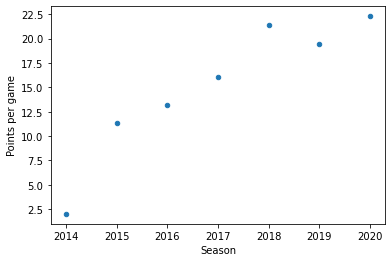

In [52]:
ax1 = d1.plot(kind='scatter', x='Season',y='pts_per_g')
ax1.set_xlabel("Season")
ax1.set_ylabel(r"Points per game")

The scatter plot above suggests that there is a low positive correlation. As the year progresses, Julius Randle's points per game (**ppg**) increases.

### Another look at Randle's Points per game
Describing the graph formulated below, it can be observed that there is a direct correlation between the age and the points per game of Julius Randle's basketball performance. As the said player ages over time, it is indicated that his scoring exponentially increased and gradually improved as well.

<AxesSubplot:xlabel='age'>

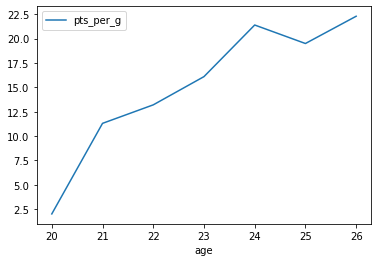

In [53]:
d1.plot(x='age',y='pts_per_g')

### Relationship between Minutes played and Points per game
In the scatter plot formulated below, it can be scrutinized that there is a direct correlation between Julius Randle's minutes played and the points he scored during his games. From the illustration, it is observable that as Julius Randle played longer in the court, his points gradually increased as well. This suggests that the player's scoring performance exponentially ameliorates as he extends his play time.

<AxesSubplot:xlabel='mp_per_g', ylabel='pts_per_g'>

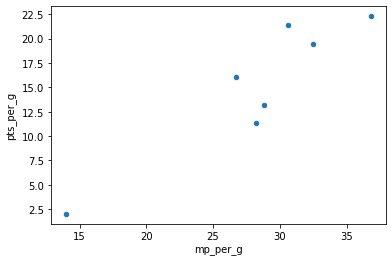

In [54]:
d1.plot(kind='scatter', x='mp_per_g',y='pts_per_g')

#### Games Missed and Total Games Played
We check Julius Randle's total games missed in his entire career.

In [55]:
d1['Total Games'] = d1.g + d1.gs
d1['Games Missed'] = d1.g - d1.gs

In [56]:
d1.describe()

,Season,age,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,pf_per_g,pts_per_g,Total Games,Games Missed
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2017.000000,23.000000,57.285714,45.857143,28.228571,5.628571,11.714286,0.465571,0.557143,1.757143,0.295500,3.271429,4.685714,0.631429,2.885714,15.114286,103.142857,11.428571
std,2.160247,2.160247,31.335360,25.109285,7.099933,2.426736,4.673838,0.072348,0.613344,1.707686,0.057507,1.750918,1.708243,0.279945,0.861062,7.089294,55.007359,14.105048
min,2014.000000,20.000000,1.000000,0.000000,14.000000,1.000000,3.000000,0.333000,0.000000,0.000000,0.222000,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000
25%,2015.500000,21.500000,45.000000,37.500000,27.450000,4.750000,10.350000,0.444500,0.100000,0.450000,0.271750,2.600000,3.550000,0.716500,2.900000,12.250000,87.000000,0.500000
50%,2017.000000,23.000000,73.000000,49.000000,28.800000,6.100000,11.000000,0.467000,0.200000,0.900000,0.277500,3.700000,5.200000,0.723000,3.300000,16.100000,128.000000,1.000000
75%,2018.500000,24.500000,77.500000,62.000000,31.550000,7.500000,15.300000,0.506000,0.950000,3.150000,0.327500,4.450000,5.900000,0.732000,3.350000,20.450000,136.000000,22.500000
max,2020.000000,26.000000,82.000000,73.000000,36.800000,7.800000,16.700000,0.558000,1.600000,4.200000,0.382000,5.100000,6.700000,0.800000,3.400000,22.300000,147.000000,33.000000


### Relationship between Points per game and Games played
In the scatter plot formulated below, it can be observed that there is an indirect correlation between the variables "point per game" and "games played". Such an analysis can be interpolated to the illustration as there is a lack of gradual and consistent associations across the two factors. In addition, discrepancies can also be observed in the 20.0 and 22.5 score frame which suggests that describing the graph as a direct correlation is an inconclusive remark.

<AxesSubplot:xlabel='pts_per_g', ylabel='gs'>

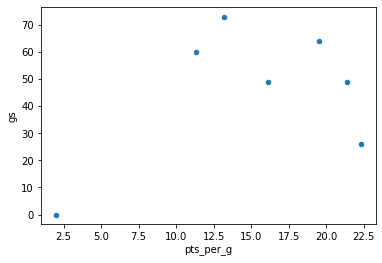

In [57]:
d1.plot(kind='scatter', x='pts_per_g',y='gs')

### Relationship between Fouls per game and Points per game
Upon observing the relationship between the "fouls_per_game" and the "points_per_game" fields, it can be characterized that their association is an indirect correlation. Such an analysis can be derived in the relationship between the two as there are certain inconsistencies and discrepancies in linking the two factors. Low values observed in between 3.0 and 3.5 also bolsters the idea that there is no direct correlation.

<AxesSubplot:xlabel='pf_per_g', ylabel='pts_per_g'>

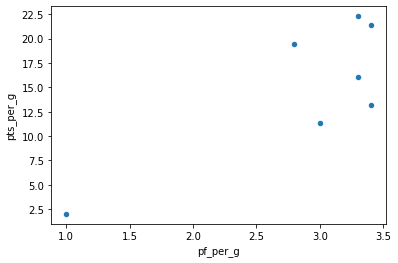

In [58]:
d1.plot(kind='scatter', x='pf_per_g', y='pts_per_g')

### Relationship betwen Minutes per game and Personal fouls per game
In the scatter plot formulated below, it can be observed that the illustration portrays a negative correlation between "minutes_per_game" and "personal_fouls_per_game" as there are noticeable discrepancies and inconsistencies. In addition to that, the outlier found in the 1.0 threshold suggests that the two factors are indirectly correlated to one another. 

Text(0, 0.5, 'Minutes played per game')

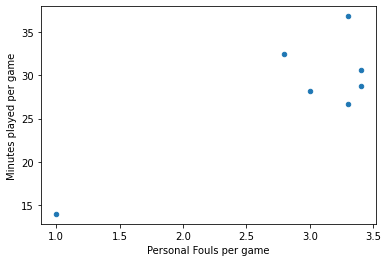

In [59]:
xplot = d1.plot(kind='scatter', x='pf_per_g',y='mp_per_g')
xplot.set_xlabel("Personal Fouls per game")
xplot.set_ylabel("Minutes played per game")

### Relationship between Position and Points per game
Below is a series of Julius Randle's two played positions and their corresponding points per game. As observed in the formulated table below, it can be incited that Julius Randle performs significantly better and has far more refined scores whilst playing as a power forward (**PF**) compared to being a center (**C**).

In [60]:
PPG = d1[['pos', 'pts_per_g']]
positions = ['C', 'PF'] # the only two positions Julius plays
PPG = PPG[ PPG['pos'].isin(positions)]
PPG

,pos,pts_per_g
0,PF,2.0
1,PF,11.3
2,PF,13.2
3,C,16.1
4,PF,21.4
5,PF,19.5
6,PF,22.3


array([<AxesSubplot:title={'center':'C'}>,
       <AxesSubplot:title={'center':'PF'}>], dtype=object)

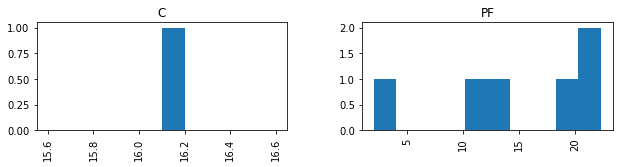

In [61]:
PPG['pts_per_g'].hist(by=PPG['pos'], figsize=(10,2))

## Field Goal percentage
It is important to know the field goal percentage **(fg%)** of a certain NBA player because the statistic alone reflects on his overall performance.

<AxesSubplot:>

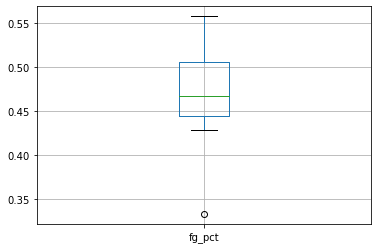

In [62]:
d1.boxplot(column='fg_pct')

In [63]:
d1[d1.fg_pct < .40]

,Season,age,team_id,lg_id,pos,g,gs,mp_per_g,fg_per_g,fga_per_g,...,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,pf_per_g,pts_per_g,Total Games,Games Missed
0,2014.0,20.0,LAL,NBA,PF,1,0,14.0,1.0,3.0,...,0.0,0.0,NaN,0.0,2.0,0.0,1.0,2.0,1,1


As depicted, there is a low outlier such as his **.33fg%** from his earliest season (2014-15). Likewise, most of Julius Randle's field goal percentage lies between **.50%** range and **.45%** range.

Likewise, we check the field goal percentage in a different view.

array([[<AxesSubplot:title={'center':'fg_pct'}>]], dtype=object)

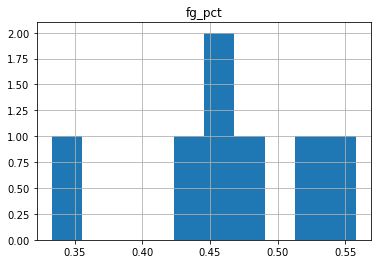

In [64]:
d1.hist(column='fg_pct')

### Box plot of points per game grouped by position

<AxesSubplot:title={'center':'pts_per_g'}, xlabel='pos'>

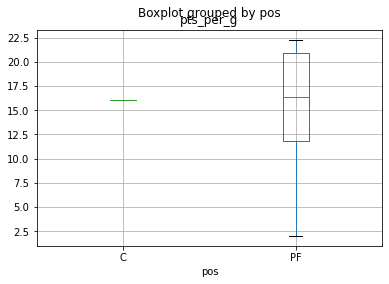

In [65]:
PPG.boxplot(column='pts_per_g', by='pos')

### Correlation between variables

In [66]:
corrd1 = d1.corr()
corrd1

,Season,age,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,pf_per_g,pts_per_g,Total Games,Games Missed
Season,1.000000,1.000000,0.098485,0.190503,0.856283,0.912441,0.931002,0.533196,0.918257,0.939725,0.616248,0.907709,0.912320,0.673557,0.582404,0.930483,0.143062,-0.120335
age,1.000000,1.000000,0.098485,0.190503,0.856283,0.912441,0.931002,0.533196,0.918257,0.939725,0.616248,0.907709,0.912320,0.673557,0.582404,0.930483,0.143062,-0.120335
g,0.098485,0.098485,1.000000,0.898204,0.426814,0.462335,0.384837,0.741772,-0.182232,-0.086943,-0.784395,0.423632,0.320168,0.725118,0.755009,0.407744,0.979662,0.622622
gs,0.190503,0.190503,0.898204,1.000000,0.539925,0.476553,0.461576,0.597776,-0.039423,0.085735,-0.655085,0.410452,0.272718,0.751707,0.733756,0.426214,0.968140,0.215260
mp_per_g,0.856283,0.856283,0.426814,0.539925,1.000000,0.922288,0.962751,0.611901,0.768464,0.790669,0.836606,0.915634,0.811495,0.923801,0.842205,0.924954,0.489598,-0.012957
fg_per_g,0.912441,0.912441,0.462335,0.476553,0.922288,1.000000,0.976256,0.770333,0.763512,0.800679,0.639429,0.993003,0.965027,0.871962,0.828947,0.997908,0.480905,0.178767
fga_per_g,0.931002,0.931002,0.384837,0.461576,0.962751,0.976256,1.000000,0.632147,0.834551,0.872530,0.743159,0.962563,0.915814,0.861673,0.772832,0.979947,0.429922,0.033263
fg_pct,0.533196,0.533196,0.741772,0.597776,0.611901,0.770333,0.632147,1.000000,0.222994,0.263691,-0.272977,0.774040,0.741515,0.791642,0.874199,0.740673,0.695423,0.583761
fg3_per_g,0.918257,0.918257,-0.182232,-0.039423,0.768464,0.763512,0.834551,0.222994,1.000000,0.981343,0.843708,0.773095,0.786727,0.481676,0.377344,0.800117,-0.121805,-0.334662
fg3a_per_g,0.939725,0.939725,-0.086943,0.085735,0.790669,0.800679,0.872530,0.263691,0.981343,1.000000,0.753024,0.788258,0.803053,0.523518,0.400759,0.828554,-0.010392,-0.345771


<AxesSubplot:>

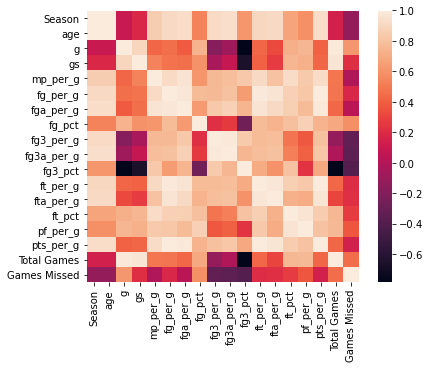

In [67]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corrd1, square=True)

## Graphing categorical variables
Interpreting the formulated bar graphs from the given data set, it can be observed that the statistical illustrations for the age and season variables all have similar results. On the other hand, the bar graph produced using the "team_id" suggests that the LA Lakers data have the highest output equating to 4.0. This implies that Julius Randle stayed with the said team for the longest amount of time than the NYK and/or NOP. Furthermore, the bar graph for the "pos" variable features two fields representing PF (power forward) and C (center). Between these two factors, the PF variable dominates C the most which also suggests that Julius Randle's games feature a higher frequency of playing the role of power forward than being a center. Lastly, the bar graph for the "fg_per_g" variable indicates that the player had a 7.8 field goal attempt score for two seasons compared to the other scores which only lasted for 1 season.

In [68]:
categorical_d1 = d1[['Season','age','team_id','pos', 'fg_per_g']]

Graphs for Season: Total = 7


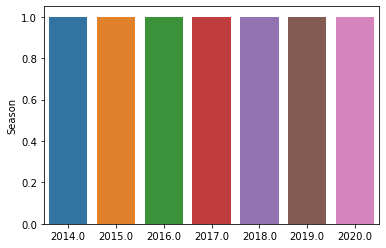

Graphs for age: Total = 7


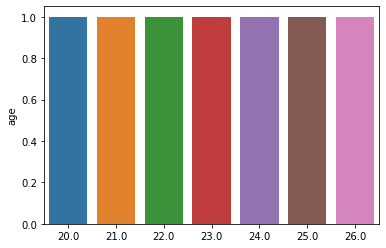

Graphs for team_id: Total = 3


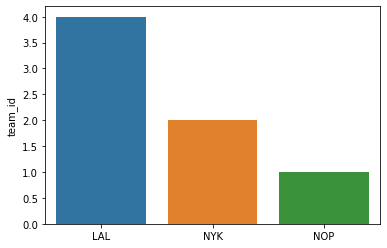

Graphs for pos: Total = 2


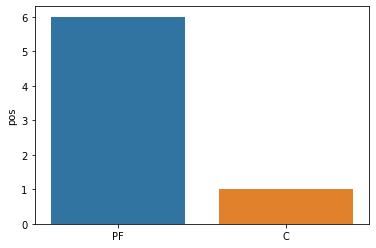

Graphs for fg_per_g: Total = 6


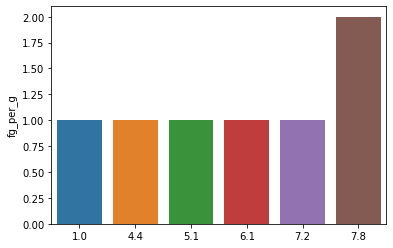

In [69]:
for i in categorical_d1.columns:
    category_num = categorical_d1[i].value_counts()
    print("Graphs for %s: Total = %d" % (i, len(category_num)))
    sns.barplot(x=category_num.index, y=category_num)
    plt.show()

# Total Games Analysis

In [70]:
d2.columns

Index(['Season', 'age', 'team_id', 'lg_id', 'pos', 'g', 'gs', 'mp', 'fg',
       'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct', 'pf',
       'pts'],
      dtype='object')

In [71]:
d2

,Season,age,team_id,lg_id,pos,g,gs,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,pf,pts
0,2014.0,20,LAL,NBA,PF,1,0,14,1,3,0.333,0,0,NaN,0,2,0.000,1,2
1,2015.0,21,LAL,NBA,PF,81,60,2286,358,835,0.429,10,36,0.278,193,270,0.715,242,919
2,2016.0,22,LAL,NBA,PF,74,73,2132,377,773,0.488,17,63,0.270,204,282,0.723,248,975
3,2017.0,23,LAL,NBA,C,82,49,2190,504,904,0.558,10,45,0.222,305,425,0.718,274,1323
4,2018.0,24,NOP,NBA,PF,73,49,2232,571,1089,0.524,67,195,0.344,356,487,0.731,246,1565
5,2019.0,25,NYK,NBA,PF,64,64,2080,463,1006,0.460,64,231,0.277,258,352,0.733,178,1248
6,2020.0,26,NYK,NBA,PF,23,23,845,182,383,0.475,36,91,0.396,120,149,0.805,77,520


In [72]:
d2.isnull()

,Season,age,team_id,lg_id,pos,g,gs,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,pf,pts
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [73]:
d2.fillna(0)

,Season,age,team_id,lg_id,pos,g,gs,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,pf,pts
0,2014.0,20,LAL,NBA,PF,1,0,14,1,3,0.333,0,0,0.000,0,2,0.000,1,2
1,2015.0,21,LAL,NBA,PF,81,60,2286,358,835,0.429,10,36,0.278,193,270,0.715,242,919
2,2016.0,22,LAL,NBA,PF,74,73,2132,377,773,0.488,17,63,0.270,204,282,0.723,248,975
3,2017.0,23,LAL,NBA,C,82,49,2190,504,904,0.558,10,45,0.222,305,425,0.718,274,1323
4,2018.0,24,NOP,NBA,PF,73,49,2232,571,1089,0.524,67,195,0.344,356,487,0.731,246,1565
5,2019.0,25,NYK,NBA,PF,64,64,2080,463,1006,0.460,64,231,0.277,258,352,0.733,178,1248
6,2020.0,26,NYK,NBA,PF,23,23,845,182,383,0.475,36,91,0.396,120,149,0.805,77,520


In [74]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Season   7 non-null      float64
 1   age      7 non-null      int64  
 2   team_id  7 non-null      object 
 3   lg_id    7 non-null      object 
 4   pos      7 non-null      object 
 5   g        7 non-null      int64  
 6   gs       7 non-null      int64  
 7   mp       7 non-null      int64  
 8   fg       7 non-null      int64  
 9   fga      7 non-null      int64  
 10  fg_pct   7 non-null      float64
 11  fg3      7 non-null      int64  
 12  fg3a     7 non-null      int64  
 13  fg3_pct  6 non-null      float64
 14  ft       7 non-null      int64  
 15  fta      7 non-null      int64  
 16  ft_pct   7 non-null      float64
 17  pf       7 non-null      int64  
 18  pts      7 non-null      int64  
dtypes: float64(4), int64(12), object(3)
memory usage: 1.2+ KB


In [75]:
d2.describe()

,Season,age,g,gs,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,pf,pts
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2017.000000,23.000000,56.857143,45.428571,1682.714286,350.857143,713.285714,0.466714,29.142857,94.428571,0.297833,205.142857,281.000000,0.632143,180.857143,936.000000
std,2.160247,2.160247,31.850843,25.526830,891.541122,198.384667,386.261878,0.072438,27.156513,86.158492,0.061840,119.027208,165.126214,0.280452,103.528464,530.719009
min,2014.000000,20.000000,1.000000,0.000000,14.000000,1.000000,3.000000,0.333000,0.000000,0.000000,0.222000,0.000000,2.000000,0.000000,1.000000,2.000000
25%,2015.500000,21.500000,43.500000,36.000000,1462.500000,270.000000,578.000000,0.444500,10.000000,40.500000,0.271750,156.500000,209.500000,0.716500,127.500000,719.500000
50%,2017.000000,23.000000,73.000000,49.000000,2132.000000,377.000000,835.000000,0.475000,17.000000,63.000000,0.277500,204.000000,282.000000,0.723000,242.000000,975.000000
75%,2018.500000,24.500000,77.500000,62.000000,2211.000000,483.500000,955.000000,0.506000,50.000000,143.000000,0.327500,281.500000,388.500000,0.732000,247.000000,1285.500000
max,2020.000000,26.000000,82.000000,73.000000,2286.000000,571.000000,1089.000000,0.558000,67.000000,231.000000,0.396000,356.000000,487.000000,0.805000,274.000000,1565.000000


### Data Visualization

#### The total points Julius accumulated from each season

These are the total points Julius accumulated from Seasons 2014-2020.
### These are the total points Julius accumulated from Seasons 2014-2020.
#### In-depth analysis:
As shown by the scatterplot formulated below, it can be suggested that Julius Randle's highest recorded total points per season occurred in the 2018 season. With about 1600 accumulated scores, Julius dominated over other seasons as his 2018 season play is by far his best season. In addition, it is also noticeable that the said player scored 0 total points during the 2014 season as this marked the start of his NBA career. Moreover, it is also incurred that 2020 is his worst seasonal play so far with a total points only settling in between the 400 to 600 threshold.

Text(0, 0.5, 'Total Points per season')

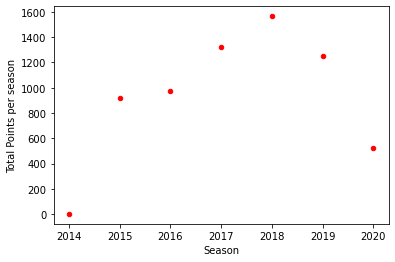

In [76]:
ax2 = d2.plot(kind='scatter', x='Season',y='pts', color='r')
ax2.set_xlabel("Season")
ax2.set_ylabel("Total Points per season")

Next, we check how many games Julius played in his 2018 season.

In [77]:
d2.loc[4,'g']

73

After locating using `.loc[]`, we see that Julius Randle played 73 out of 81 games in his 2018-19 season where he scored a total of **1,565** points.

### Graph in-depth analysis:
In the scatterplot formulated below, it can also be observed that there is a mild correlation between the total points Julius Randle had scored as well the number of personal fouls he committed. As the player gained higher scores and had a much better performance compared to his previous ones, the number of personal fouls exponentially grew as well. However, noticeable discrepancies can also be observed in the illustration within the 200-250 personal foul threshold.

<AxesSubplot:xlabel='pf', ylabel='pts'>

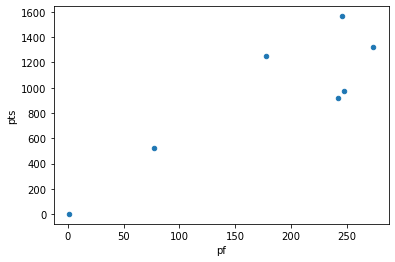

In [78]:
d2.plot(kind='scatter', x='pf', y='pts') # relationship ng total points at
# total personal fouls nya sa career nya so far

### Checking correlation

In [79]:
corrd2 = d2.corr()
corrd2

,Season,age,g,gs,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,pf,pts
Season,1.000000,1.000000,0.075091,0.160186,0.188738,0.368288,0.359131,0.558099,0.755706,0.711892,0.633580,0.416135,0.378455,0.676464,0.073032,0.407332
age,1.000000,1.000000,0.075091,0.160186,0.188738,0.368288,0.359131,0.558099,0.755706,0.711892,0.633580,0.416135,0.378455,0.676464,0.073032,0.407332
g,0.075091,0.075091,1.000000,0.902245,0.987796,0.899045,0.918090,0.708990,0.212755,0.291366,-0.817228,0.850767,0.863785,0.699497,0.988782,0.873825
gs,0.160186,0.160186,0.902245,1.000000,0.929524,0.787283,0.854529,0.570713,0.305476,0.406765,-0.699937,0.707479,0.714526,0.723689,0.867430,0.762880
mp,0.188738,0.188738,0.987796,0.929524,1.000000,0.927699,0.959060,0.717719,0.349800,0.424192,-0.751274,0.880046,0.888001,0.759089,0.968009,0.908826
fg,0.368288,0.368288,0.899045,0.787283,0.927699,1.000000,0.981888,0.829320,0.553607,0.607112,-0.502577,0.991404,0.993182,0.722416,0.900245,0.998282
fga,0.359131,0.359131,0.918090,0.854529,0.959060,0.981888,1.000000,0.749861,0.574473,0.638783,-0.518690,0.955145,0.956726,0.754589,0.895687,0.977678
fg_pct,0.558099,0.558099,0.708990,0.570713,0.717719,0.829320,0.749861,1.000000,0.390096,0.386278,-0.222344,0.861380,0.851602,0.800637,0.768191,0.833153
fg3,0.755706,0.755706,0.212755,0.305476,0.349800,0.553607,0.574473,0.390096,1.000000,0.978914,0.476852,0.581765,0.555314,0.493097,0.185380,0.595526
fg3a,0.711892,0.711892,0.291366,0.406765,0.424192,0.607112,0.638783,0.386278,0.978914,1.000000,0.283507,0.615355,0.594010,0.488864,0.246910,0.641980


### Heatmap Analysis
Heatmaps are excellent mediums to illustrate the correlation levels across a plethora of variables. In the map formulated below, it can be suggested that the fields such as ft_pct, pts, fta, ft, fg_pct all have high correlation levels all throughout as indicated by their light shaded gradients. In addition, ft_pct is observed to be the variable which has the largest consistent correlation level as shown by the heatmap.

<AxesSubplot:>

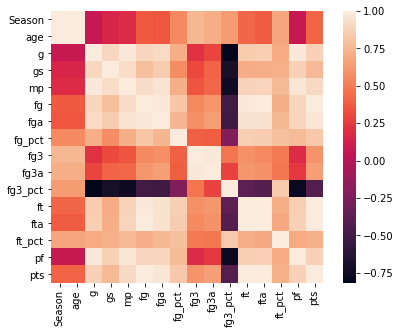

In [80]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corrd2, square=True)

### Boxplot of Total points

<AxesSubplot:>

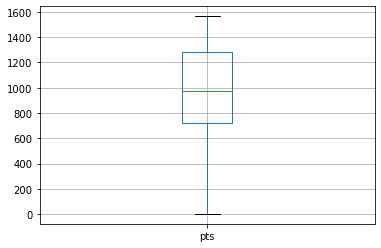

In [81]:
d2.boxplot(column='pts')

### Relationship between Total Points and Total Field Goals

<AxesSubplot:xlabel='pts', ylabel='fg'>

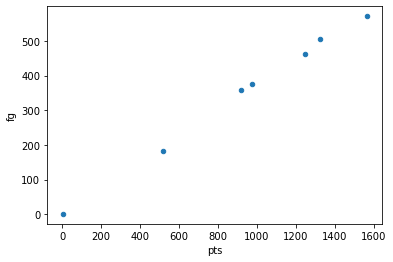

In [82]:
d2.plot(kind='scatter', x='pts',y='fg')

# Analysis of Game Highs

In [83]:
d3

,Season,age,team_id,lg_id,mp,fg,fga,fg3,fg3a,ft,fta,pf,pts
0,2014.0,20.0,LAL,NBA,13:34,1,3,0,0,0,2,1,2
1,2015.0,21.0,LAL,NBA,38:56,10,19,1,3,7,11,6,23
2,2016.0,22.0,LAL,NBA,37:56,13,19,2,4,9,11,6,32
3,2017.0,23.0,LAL,NBA,40:15,14,19,2,3,10,14,6,36
4,2018.0,24.0,NOP,NBA,42:06,20,34,4,7,11,13,6,45
5,2019.0,25.0,NYK,NBA,46:12,14,26,5,9,10,13,6,35
6,2020.0,26.0,NYK,NBA,44:09,13,26,5,8,10,13,6,30


<AxesSubplot:xlabel='Season'>

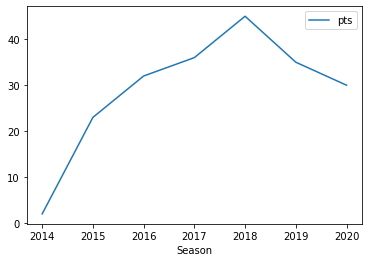

In [84]:
d3.plot(x='Season', y='pts')

In [85]:
corrd3 = d3.corr()

<AxesSubplot:>

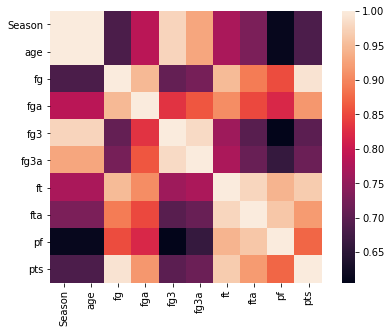

In [86]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corrd3, square=True)

# Heatmap Interpretation and Analysis
In the formulated heatmap above illustrating the correlation levels across the procured variables in the data gathering procedure, it can be observed that the elements ft, pts, fta, fg, and fga have the most significant number of correlation levels. This suggests that the aforementioned variables can be viable assets for predicting positive outcomes during succeeding methodologies. On the contrary, fields such as pf, fg3, fg3a, season, and age have abysmal correlation levels which implies that incorporating these variables may produce inconsistent results.

## The Analysis so far

Based from the analysis so far, we can say that his 2018-2019 was his best season so far. After analyzing the Per Game statistics, although it was his second most points per game, it was in that season that he scored the most total points in a single season in his career so far.

In [87]:
d1.to_csv('per_game_cleaned.csv', index=False)
d2.to_csv('total_game_cleaned.csv', index=False)
d3.to_csv('game_highs_cleaned.csv', index=False)

# Modelling Phase

In [88]:
df1 = pd.read_csv('per_game_cleaned.csv')
df2 = pd.read_csv('total_game_cleaned.csv')
df3 = pd.read_csv('game_highs_cleaned.csv')

In [89]:
df1.columns

Index(['Season', 'age', 'team_id', 'lg_id', 'pos', 'g', 'gs', 'mp_per_g',
       'fg_per_g', 'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct',
       'ft_per_g', 'fta_per_g', 'ft_pct', 'pf_per_g', 'pts_per_g',
       'Total Games', 'Games Missed'],
      dtype='object')

In [90]:
df1

,Season,age,team_id,lg_id,pos,g,gs,mp_per_g,fg_per_g,fga_per_g,...,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,pf_per_g,pts_per_g,Total Games,Games Missed
0,2014.0,20.0,LAL,NBA,PF,1,0,14.0,1.0,3.0,...,0.0,0.0,NaN,0.0,2.0,0.000,1.0,2.0,1,1
1,2015.0,21.0,LAL,NBA,PF,81,60,28.2,4.4,10.3,...,0.1,0.4,0.278,2.4,3.3,0.715,3.0,11.3,141,21
2,2016.0,22.0,LAL,NBA,PF,74,73,28.8,5.1,10.4,...,0.2,0.9,0.270,2.8,3.8,0.723,3.4,13.2,147,1
3,2017.0,23.0,LAL,NBA,C,82,49,26.7,6.1,11.0,...,0.1,0.5,0.222,3.7,5.2,0.718,3.3,16.1,131,33
4,2018.0,24.0,NOP,NBA,PF,73,49,30.6,7.8,14.9,...,0.9,2.7,0.344,4.9,6.7,0.731,3.4,21.4,122,24
5,2019.0,25.0,NYK,NBA,PF,64,64,32.5,7.2,15.7,...,1.0,3.6,0.277,4.0,5.5,0.733,2.8,19.5,128,0
6,2020.0,26.0,NYK,NBA,PF,26,26,36.8,7.8,16.7,...,1.6,4.2,0.382,5.1,6.3,0.800,3.3,22.3,52,0


# Creating Model

In [91]:
df1_model = df1[['Season', 'age', 'pos', 'g', 'gs', 'mp_per_g', 'fg_per_g',
                 'fga_per_g', 'fg_pct', 'pf_per_g', 'pts_per_g']]

## Importing the libraries for Modelling

In [92]:
from sklearn import linear_model

In [93]:
df1

,Season,age,team_id,lg_id,pos,g,gs,mp_per_g,fg_per_g,fga_per_g,...,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,pf_per_g,pts_per_g,Total Games,Games Missed
0,2014.0,20.0,LAL,NBA,PF,1,0,14.0,1.0,3.0,...,0.0,0.0,NaN,0.0,2.0,0.000,1.0,2.0,1,1
1,2015.0,21.0,LAL,NBA,PF,81,60,28.2,4.4,10.3,...,0.1,0.4,0.278,2.4,3.3,0.715,3.0,11.3,141,21
2,2016.0,22.0,LAL,NBA,PF,74,73,28.8,5.1,10.4,...,0.2,0.9,0.270,2.8,3.8,0.723,3.4,13.2,147,1
3,2017.0,23.0,LAL,NBA,C,82,49,26.7,6.1,11.0,...,0.1,0.5,0.222,3.7,5.2,0.718,3.3,16.1,131,33
4,2018.0,24.0,NOP,NBA,PF,73,49,30.6,7.8,14.9,...,0.9,2.7,0.344,4.9,6.7,0.731,3.4,21.4,122,24
5,2019.0,25.0,NYK,NBA,PF,64,64,32.5,7.2,15.7,...,1.0,3.6,0.277,4.0,5.5,0.733,2.8,19.5,128,0
6,2020.0,26.0,NYK,NBA,PF,26,26,36.8,7.8,16.7,...,1.6,4.2,0.382,5.1,6.3,0.800,3.3,22.3,52,0


# Training and testing the Per Game statistics

In [94]:
df1_model.columns

Index(['Season', 'age', 'pos', 'g', 'gs', 'mp_per_g', 'fg_per_g', 'fga_per_g',
       'fg_pct', 'pf_per_g', 'pts_per_g'],
      dtype='object')

Since we will predict whether there is a positive outcome or not for Mr. Randle's next season, we will use his Per Game statistics.

In [95]:
# selecting age and pts_per_g
age = pd.DataFrame(df1_model['age'])
ppg = pd.DataFrame(df1_model['pts_per_g'])

In [96]:
age

,age
0,20.0
1,21.0
2,22.0
3,23.0
4,24.0
5,25.0
6,26.0


In [97]:
ppg

,pts_per_g
0,2.0
1,11.3
2,13.2
3,16.1
4,21.4
5,19.5
6,22.3


In [98]:
# Building the linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(age, ppg)

In [99]:
model.coef_

array([[3.05357143]])

In [100]:
model.intercept_

array([-55.11785714])

In [101]:
model.score(age,ppg) # model evaluation

0.8657986867787232

# Evaluation

### Predicting Points per game
As it has been observed that there is a direct correlation between the age of Julius Randle and the points he scored during his basketball games, the students opted to predict potential points that the player will score as he grows older by 28, 29, and 30 years old. The findings suggested that as Julius Randle ages over time, it is possible that the total number of points per game that he will score will increment by 3 annually.

In [102]:
age_new = np.array([27])
age_new = age_new.reshape(1,-1)
ppg_pred = model.predict(age_new)
ppg_pred

array([[27.32857143]])

In [103]:
# predict more values
X = ([28,29,30])
X = pd.DataFrame(X)
Y = model.predict(X)
Y = pd.DataFrame(Y)
df = pd.concat([X, Y], axis=1, keys=['age_new','ppg_predicted'])
df

,age_new,ppg_predicted
,0,0
0,28,30.382143
1,29,33.435714
2,30,36.489286


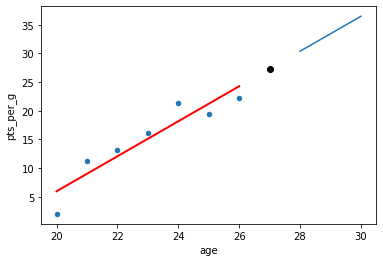

In [104]:
# Visualize the results
df1_model.plot(kind='scatter', x='age', y='pts_per_g')
# plotting the regression line
plt.plot(age, model.predict(age), color='red', linewidth=2)
#plotting the predicted value
plt.scatter(age_new, ppg_pred, color='black')
plt.plot(X.to_numpy(), Y.to_numpy())
plt.show()

### More predictions

#### Using Minutes per game and Points per game
Aside from utilizing the positive correlation between Julius Randle's age and the number of points he scored per game, incorporating the minutes per game to check for significant outcomes can also be a viable option. Upon doing so, the results suggested that as minutes per game increments by 1, the player's performance also increases in direct correlation. This implies that Julius Randle can be able to score more the longer he stays in the court; which can also instigate that Julius Randle can be a potent player during games.

In [105]:
mpg = pd.DataFrame(df1_model['mp_per_g'])

In [106]:
mpg

,mp_per_g
0,14.0
1,28.2
2,28.8
3,26.7
4,30.6
5,32.5
6,36.8


In [107]:
ppg

,pts_per_g
0,2.0
1,11.3
2,13.2
3,16.1
4,21.4
5,19.5
6,22.3


In [108]:
model2 = lm.fit(mpg, ppg)

In [109]:
model2.coef_

array([[0.92356814]])

In [110]:
model2.intercept_

array([-10.95672357])

In [111]:
model2.score(mpg, ppg)

0.8555400708608528

In [112]:
# Predict new values
mpg_new = np.array([37.5])
mpg_new = mpg_new.reshape(1,-1)
ppg_pred1 = model2.predict(mpg_new)
ppg_pred1

array([[23.67708178]])

In [113]:
Xnew = ([37, 36, 39, 38, 33, 32, 35])
Xnew = pd.DataFrame(Xnew)
Ynew = model2.predict(Xnew)
Ynew = pd.DataFrame(Ynew)
df_ = pd.concat([Xnew, Ynew], axis=1, keys=['mpg_new', 'ppg_prediction'])
df_

,mpg_new,ppg_prediction
,0,0
0,37,23.215298
1,36,22.291730
2,39,25.062434
3,38,24.138866
4,33,19.521025
5,32,18.597457
6,35,21.368161


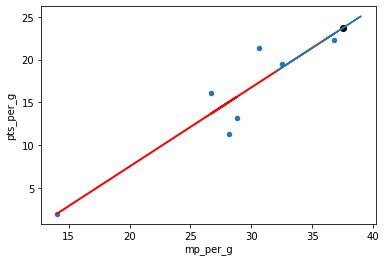

In [114]:
# Visualizing the results
df1_model.plot(kind='scatter', x='mp_per_g', y='pts_per_g')
plt.plot(mpg, model2.predict(mpg), color='red', linewidth=2)
plt.scatter(mpg_new, ppg_pred1, color='black')
plt.plot(Xnew.to_numpy(), Ynew.to_numpy()) # predicted
plt.show()

Based on our observations from the two scatterplots above, we assumed that there is a positive trend. When the independent variable, the age, increases, the dependent variables, the points per game, increases as well. This was observed in the first scatterplot diagram. When the independent variable, the minutes per game, increases, the dependent variable, the points per game, increases as well. This was observed in the second scatterplot diagram. We can predict that as Julius Randle ages, he can achieve higher average scores than his previous years. We can also predict that as Julius Randle stays in the court for a longer period of time, he can achieve higher points. Our data model can also observe other players in the league in general as this can predict each player's statistics. From all the data gathering and data analyzations we had done, we learned that all of these interpretations of data cannot be done without our data model.

# References

##### Dataset used
https://www.basketball-reference.com/players/r/randlju01.html

##### Other references:
[NBA Player improvement prediction by zxl24] https://github.com/zxl124/NBA_improvement_prediction